# Exploratory analysis

## 1.1 Basic description of the data along with their characteristics

In [1]:
import os
import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import statsmodels.api as sm
import pylab as py

### Dataset information 

In [2]:
dataset_path = r"..\data"

#### Select files

In [3]:
# Check dataset directory
os.listdir(dataset_path)

['observation.csv', 'patient.csv', 'station.csv']

In [4]:
# All files with .csv
extension = 'csv'
filenames = [i for i in glob.glob(dataset_path + '/*')]
print(*filenames, sep='\n')

..\data\observation.csv
..\data\patient.csv
..\data\station.csv


We have 3 csv files with observation, patient and station data. 

In [5]:
observation_file_name = "observation.csv"
patient_file_name = "patient.csv"
station_file_name = "station.csv"

#### Load dataset

In [6]:
observation = pd.read_csv(dataset_path + '/' + observation_file_name, sep='\t')
patient = pd.read_csv(dataset_path + '/' + patient_file_name, sep='\t')
station = pd.read_csv(dataset_path + '/' + station_file_name, sep='\t')

---

 (A-1b) Analysis of data structures such as files (structures and relationships, number, types, ...), records (structures, number of records, number of attributes, types, ...) 

#### Get inforamtion about data

##### Observation dataset

In [7]:
# Get data about observation shape and list of columns
print(f"Size: {observation.shape}, \nColumns: {list(observation.columns)}")
print("\nDtype, memory usage, total columns and missing values information:")
observation.info()

print("Statistics:")
observation.describe()

Size: (12088, 23), 
Columns: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']

Dtype, memory usage, total columns and missing values information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12088 entries, 0 to 12087
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12088 non-null  float64
 1   HR                     12088 non-null  float64
 2   PI                     12088 non-null  float64
 3   RR                     12088 non-null  float64
 4   EtCO₂                  12088 non-null  float64
 5   FiO₂                   12088 non-null  float64
 6   PRV                    12088 non-null  float64
 7   BP                     12088 n

SpO₂            HR            PI            RR         EtCO₂  \
count  12088.000000  12088.000000  12088.000000  12088.000000  12088.000000   
mean      97.789144     80.675753     10.327800     16.340804     39.531746   
std        0.950132      5.156417      2.805859      0.970376      1.195541   
min       95.000000     60.000000      0.200000     12.000000     35.000000   
25%       97.029865     77.250440      8.226524     15.690670     38.732323   
50%       97.942808     80.670109     10.465003     16.340153     39.525448   
75%       98.541417     84.138759     12.445203     16.982813     40.334549   
max      100.000000    100.000000     20.000000     20.000000     45.000000   

               FiO₂           PRV            BP  Skin Temperature  \
count  12088.000000  12088.000000  12088.000000      12088.000000   
mean      58.819988    110.635328    104.606930         35.860435   
std       14.818691     23.734484      4.092904          0.542262   
min       21.000000     20.000000     90.000000         33.000000   
25%       47.143882     95.637946    101.862408         35.501693   
50%       56.551599    110.321626    104.615750         35.860090   
75%       71.196667    125.503456    107.344485         36.214512   
max      100.000000    200.000000    120.000000         38.000000   

       Motion/Activity index  ...            CO  Blood Flow Index  \
count           12088.000000  ...  12088.000000      12088.000000   
mean                9.016540  ...      4.169678         52.543862   
std                 1.002827  ...      0.202979         11.541959   
min                 5.473387  ...      4.000000          0.000000   
25%                 8.340295  ...      4.062011         44.823845   
50%                 9.006308  ...      4.109274         52.549358   
75%                 9.695857  ...      4.199741         60.252690   
max                12.835262  ...      8.000000        100.000000   

       PPG waveform features  Signal Quality Index  Respiratory effort  \
count           12088.000000          12088.000000        12088.000000   
mean               48.785891             50.040721           51.649729   
std                13.604437             13.590957           13.658884   
min                 0.000000              0.000000            0.000000   
25%                39.554208             41.010735           42.310923   
50%                48.645060             50.093145           51.531253   
75%                58.114233             59.299025           60.788784   
max               100.000000            100.000000          100.000000   

       O₂ extraction ratio           SNR      oximetry      latitude  \
count         12088.000000  12088.000000  12088.000000  12088.000000   
mean              0.249610     29.975669      0.594226     29.506871   
std               0.028937      5.767106      0.491062     22.265141   
min               0.200000     20.000000      0.000000    -54.800000   
25%               0.224570     24.960789      0.000000     15.794080   
50%               0.249257     30.061484      1.000000     35.882640   
75%               0.274759     34.947427      1.000000     45.503690   
max               0.300000     40.000000      1.000000     61.784910   

          longitude  
count  12088.000000  
mean       7.158811  
std       71.970762  
min     -122.867050  
25%      -68.300000  
50%        8.738120  
75%       57.355200  
max      171.253640  

[8 rows x 23 columns]

In [8]:
observation.head()

SpO₂         HR         PI         RR      EtCO₂       FiO₂  \
0  96.005809  71.669169  12.380728  16.916171  40.592169  78.992179   
1  97.208270  82.512633   8.802382  15.792656  39.647997  57.089529   
2  96.919221  77.942408  14.110306  14.657673  39.008462  83.962421   
3  97.011211  78.433073   8.534112  15.806180  37.356794  58.139799   
4  96.699843  85.302639  12.290772  16.316361  40.773904  83.712906   

          PRV          BP  Skin Temperature  Motion/Activity index  ...  \
0  103.176621  106.570788         36.117423               9.911503  ...   
1   99.711154  105.413761         36.422009               9.835162  ...   
2  118.995910  101.620290         36.227348               8.190510  ...   
3   77.411603  106.115775         35.704828               9.699732  ...   
4  107.589199  109.592365         35.222284               7.442800  ...   

         CO  Blood Flow Index  PPG waveform features  Signal Quality Index  \
0  4.028753         54.422330              42.155564             56.837167   
1  4.156491         28.771207              58.476169             51.285430   
2  4.063023         38.542022              58.358967             63.342115   
3  4.078451         53.532208              24.794818             67.163709   
4  4.238860         60.371147              46.412184             52.398990   

   Respiratory effort  O₂ extraction ratio        SNR  oximetry  latitude  \
0           18.123893             0.266448  38.819230       0.0  41.72063   
1           31.089081             0.293791  32.382457       0.0  50.72360   
2           43.244997             0.287357  21.294079       1.0   3.27833   
3           54.929721             0.262011  38.564420       0.0  44.85278   
4           91.368052             0.200199  26.105870       0.0   6.15038   

   longitude  
0   12.67230  
1   -3.52751  
2   32.88667  
3   65.50917  
4    6.83042  

[5 rows x 23 columns]

##### Patient dataset

In [9]:
print(f"Size: {patient.shape}, \nColumns: {list(patient.columns)}")
print("\nDtype, memory usage, total columns and missing values information:")
patient.info()

print("Statistics:")
patient.describe()

Size: (2109, 13), 
Columns: ['ssn', 'job', 'company', 'mail', 'address', 'name', 'birthdate', 'username', 'current_location', 'registration', 'blood_group', 'user_id', 'station_ID']

Dtype, memory usage, total columns and missing values information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ssn               2109 non-null   object
 1   job               633 non-null    object
 2   company           2109 non-null   object
 3   mail              2109 non-null   object
 4   address           1793 non-null   object
 5   name              2109 non-null   object
 6   birthdate         1160 non-null   object
 7   username          2109 non-null   object
 8   current_location  2004 non-null   object
 9   registration      2109 non-null   object
 10  blood_group       2109 non-null   object
 11  user_id           2109 non-null   int64 

user_id   station_ID
count  2109.000000  2109.000000
mean   1057.982456   396.365102
std     613.315783   226.317436
min       1.000000     0.000000
25%     515.000000   205.000000
50%    1049.000000   396.000000
75%    1597.000000   592.000000
max    2108.000000   790.000000

In [10]:
patient.head()

ssn                                    job         company  \
0       16079358484  Tecnólogo em produção Sucroalcooleira       Aparecida   
1       26108593415                                    NaN         da Cruz   
2       719-39-4782                                    NaN        合同会社松田運輸   
3       217-55-1186                                    NaN       長谷川電気有限会社   
4  DGLNNI79D10E171A                                    NaN  Pavone e figli   

                        mail  \
0  henry-gabriel43@ig.com.br   
1      melobenicio@ig.com.br   
2       rikakato@hotmail.com   
3         satomi76@yahoo.com   
4      gferragamo@hotmail.it   

                                             address                  name  \
0  Travessa Ana Lívia Campos, 91\nSanto André\n25...         Matteo da Paz   
1                                                NaN         Olívia Borges   
2                        青森県足立区京橋13丁目8番7号 クレスト四番町179                 加藤 和也   
3                                                NaN                山田 裕美子   
4    Rotonda Ariasso, 82\n30170, Venezia Mestre (VE)  Dott. Giovanna Gatto   

    birthdate      username                                 current_location  \
0         NaN  biancaaraujo  (Decimal('-76.8034745'), Decimal('-20.458717'))   
1  1953-03-05   guilherme39   (Decimal('67.895901'), Decimal('-127.389115'))   
2  1992-07-20     yoichiito   (Decimal('18.284540'), Decimal('-177.076638'))   
3         NaN  tanakaharuka   (Decimal('-68.872621'), Decimal('-46.050857'))   
4  2012-09-30     claudia38  (Decimal('-48.083341'), Decimal('-134.277595'))   

           registration blood_group  user_id  station_ID  
0            2023-01-02          B+     1184         138  
1  09/21/2023, 00:00:00          O-      866         240  
2            2023/04/18          B+     1041          48  
3           11 Jan 2023         AB-      867         674  
4            2020/11/21          B+      534         101

##### Station dataset

In [11]:
print(f"Size: {station.shape}, \nColumns: {list(station.columns)}")
print("\nDtype, memory usage, total columns and missing values information:")
station.info()

print("Statistics:")
station.describe()

Size: (791, 6), 
Columns: ['location', 'revision', 'QoS', 'latitude', 'longitude', 'station']

Dtype, memory usage, total columns and missing values information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   791 non-null    object 
 1   revision   791 non-null    object 
 2   QoS        791 non-null    object 
 3   latitude   791 non-null    float64
 4   longitude  791 non-null    float64
 5   station    791 non-null    object 
dtypes: float64(2), object(4)
memory usage: 37.2+ KB
Statistics:


latitude   longitude
count  791.000000  791.000000
mean    29.519970    7.278331
std     22.234620   72.098136
min    -54.800000 -122.867050
25%     15.918940  -68.300000
50%     35.827560    8.738120
75%     45.498985   61.432185
max     61.784910  171.253640

In [12]:
station.head()

location     revision   QoS  latitude  longitude  \
0         Europe/Sofia   2016-01-12  good  43.41250   23.22500   
1        Europe/Madrid  14 Sep 2021  good  38.68712   -4.10734   
2  America/Los_Angeles   2015-11-30  good  36.20829 -115.98391   
3        Europe/Vienna   2024/09/22  good  47.05000   15.46667   
4          Europe/Rome   2016-07-27  good  42.67164   14.01481   

                station  
0               Montana  
1           Puertollano  
2               Pahrump  
3           Sankt Peter  
4  Roseto degli Abruzzi

---

(B-1b) Analysis of individual attributes: for the selected significant attributes (min 10), analyze their distributions and basic descriptive statistics and whether they meet the prescribed conditions and range of measured values.  

In this step we analyze individual attributes, their distributions and basic descriptive statistics and whether it meets the prescribed conditions and 
the range of values measured.  

In the course of the study, we investigated basic descriptive statistics using the discribe() command, which shows the range of values and analytical information.

We have 23 coulmn of observation, 13 of patient and 6 of station: 

Observation: ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']

Patient: ['ssn', 'job', 'company', 'mail', 'address', 'name', 'birthdate', 'username', 'current_location', 'registration', 'blood_group', 'user_id', 'station_ID']

Station: ['location', 'revision', 'QoS', 'latitude', 'longitude', 'station']

Lat's start with this columns: 
1) Observation(12):  
    SpO₂, oximetry, O₂ extraction ratio, 
    Skin Temperature, HR, RR, BP, Hb level,
    SNR, EtCO₂, CO, Signal Quality Index
2) Patient(2): birthdate, blood_group
3) Station(3): QoS, station, location

---

1. Observation

O₂ extraction ratio - Calculated oxygen extraction metric  
Value Range: 0.2–0.3

In [13]:
print(f"Var O₂ extraction ratio: {observation['O₂ extraction ratio'].var():.6f}")
print(f"Median O₂ extraction ratio: {observation['O₂ extraction ratio'].median():.6f}")
observation['O₂ extraction ratio'].describe()

Var O₂ extraction ratio: 0.000837
Median O₂ extraction ratio: 0.249257


count    12088.000000
mean         0.249610
std          0.028937
min          0.200000
25%          0.224570
50%          0.249257
75%          0.274759
max          0.300000
Name: O₂ extraction ratio, dtype: float64

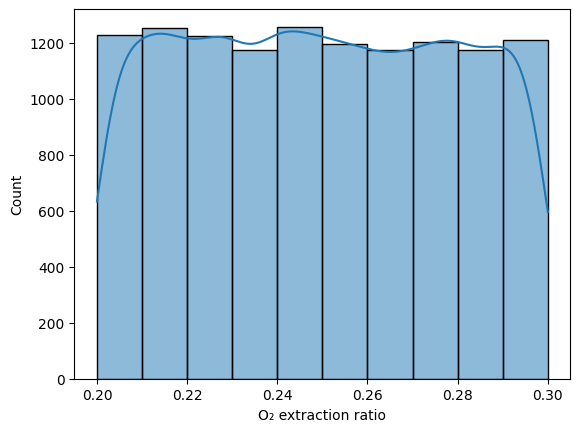

In [14]:
# observation['O₂ extraction ratio'].plot(kind='hist')
sns.histplot(observation['O₂ extraction ratio'], bins=10, kde=True)
plt.show()

Oximetry is 1 of 0

In [15]:
observation['oximetry'].value_counts()

oximetry
1.0    7183
0.0    4905
Name: count, dtype: int64

In [16]:
print(f"Var oximetry: {observation['oximetry'].var():.6f}")
print(f"Median oximetry: {observation['oximetry'].median():.6f}")
print(f"Mean oximetry: {observation['oximetry'].mean():.6f}")
observation['oximetry'].describe()

Var oximetry: 0.241141
Median oximetry: 1.000000
Mean oximetry: 0.594226


count    12088.000000
mean         0.594226
std          0.491062
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: oximetry, dtype: float64

<Axes: ylabel='count'>

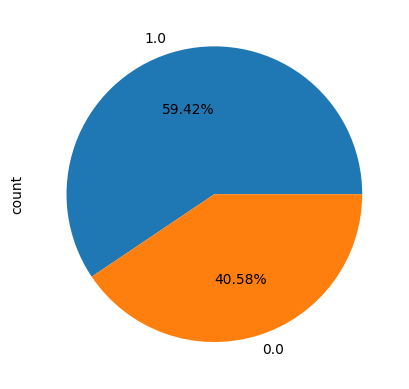

In [17]:
observation['oximetry'].value_counts().plot(kind='pie', autopct='%1.2f%%')

Peripheral temperatu  
Value Range: 33–38 °C

In [18]:
print(f"Var Skin Temperature: {observation['Skin Temperature'].var():.6f}")
print(f"Median Skin Temperature: {observation['Skin Temperature'].median():.6f}")
observation['Skin Temperature'].describe()

Var Skin Temperature: 0.294048
Median Skin Temperature: 35.860090


count    12088.000000
mean        35.860435
std          0.542262
min         33.000000
25%         35.501693
50%         35.860090
75%         36.214512
max         38.000000
Name: Skin Temperature, dtype: float64

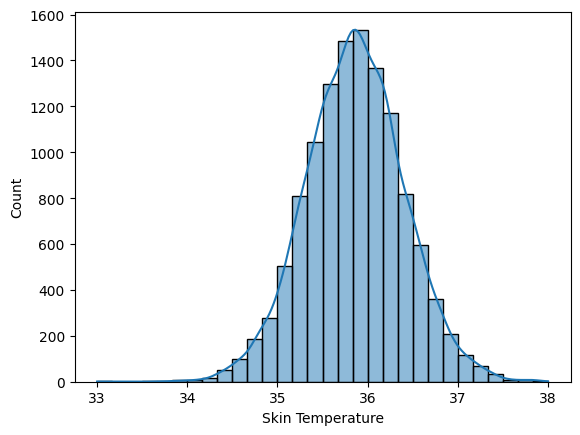

In [19]:
# observation['Skin Temperature'].plot(kind='hist', bins=30)
sns.histplot(observation['Skin Temperature'], bins=30, kde=True)
plt.show()

SpO₂ - Peripheral oxygen saturation  
Value Range: 95–100%

In [20]:
print(f"Var SpO₂: {observation['SpO₂'].var():.6f}")
print(f"Median SpO₂: {observation['SpO₂'].median():.6f}")
observation['SpO₂'].describe()

Var SpO₂: 0.902751
Median SpO₂: 97.942808


count    12088.000000
mean        97.789144
std          0.950132
min         95.000000
25%         97.029865
50%         97.942808
75%         98.541417
max        100.000000
Name: SpO₂, dtype: float64

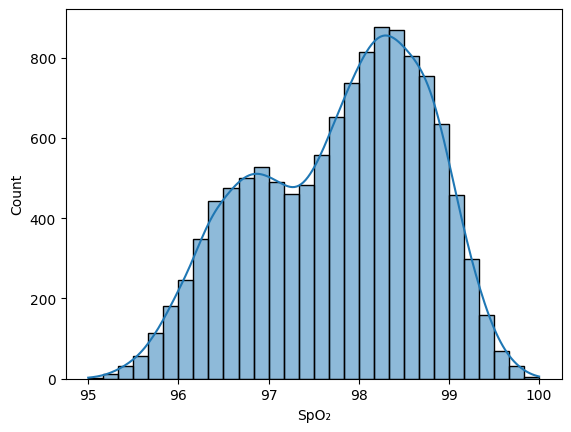

In [21]:
# observation['SpO₂'].plot(kind='hist', bins=30)
sns.histplot(observation['SpO₂'], bins=30, kde=True)
plt.show()

RR - Respiratory rate  
Value Range: 12–20 breaths/min

In [22]:
print(f"Median RR: {observation['RR'].median():.6f}")
print(f"Var RR: {observation['RR'].var():.6f}")
observation['RR'].describe()

Median RR: 16.340153
Var RR: 0.941629


count    12088.000000
mean        16.340804
std          0.970376
min         12.000000
25%         15.690670
50%         16.340153
75%         16.982813
max         20.000000
Name: RR, dtype: float64

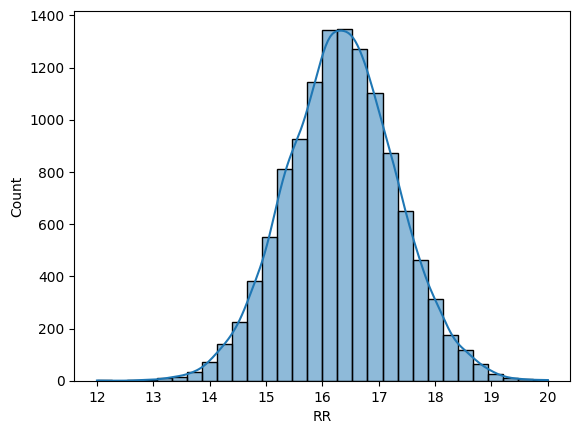

In [23]:
# observation['RR'].plot(kind='hist', bins=30)
sns.histplot(observation['RR'], bins=30, kde=True)
plt.show()

HR - Heart rate from pulse oximeter  
Value Range: 60–100 bpm


In [24]:
print(f"Var HR: {observation['HR'].var():.6f}")
print(f"Median HR: {observation['HR'].median():.6f}")
observation['HR'].describe()

Var HR: 26.588637
Median HR: 80.670109


count    12088.000000
mean        80.675753
std          5.156417
min         60.000000
25%         77.250440
50%         80.670109
75%         84.138759
max        100.000000
Name: HR, dtype: float64

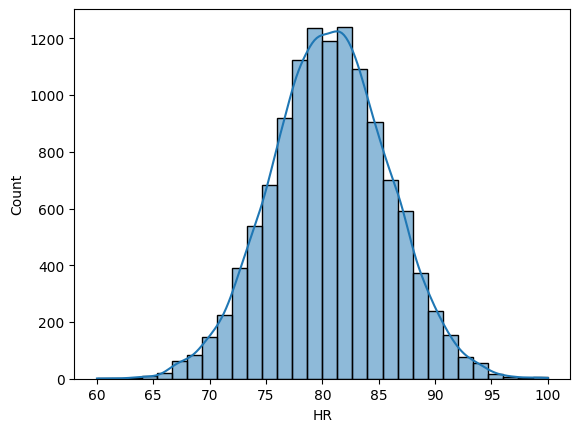

In [25]:
# observation['HR'].plot(kind='hist', bins=30)
sns.histplot(observation['HR'], bins=30, kde=True)
plt.show()

Signal Quality Index - Reliability indicator of readings  
Value Range: 0–100

In [26]:
print(f"Var Signal Quality Index: {observation['Signal Quality Index'].var():.6f}")
print(f"Median Signal Quality Index: {observation['Signal Quality Index'].median():.6f}")
observation['Signal Quality Index'].describe()

Var Signal Quality Index: 184.714104
Median Signal Quality Index: 50.093145


count    12088.000000
mean        50.040721
std         13.590957
min          0.000000
25%         41.010735
50%         50.093145
75%         59.299025
max        100.000000
Name: Signal Quality Index, dtype: float64

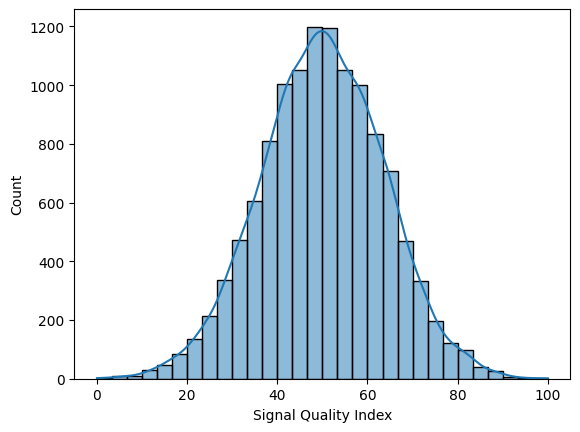

In [27]:
# observation['Signal Quality Index'].plot(kind='hist', bins=30)
sns.histplot(observation['Signal Quality Index'], bins=30, kde=True)
plt.show()

SNR - Signal-to-noise ratio from sensor  
20–40 dB

In [28]:
print(f"Var SNR: {observation['SNR'].var():.6f}")
print(f"Median SNR: {observation['SNR'].median():.6f}")
observation['SNR'].describe()

Var SNR: 33.259513
Median SNR: 30.061484


count    12088.000000
mean        29.975669
std          5.767106
min         20.000000
25%         24.960789
50%         30.061484
75%         34.947427
max         40.000000
Name: SNR, dtype: float64

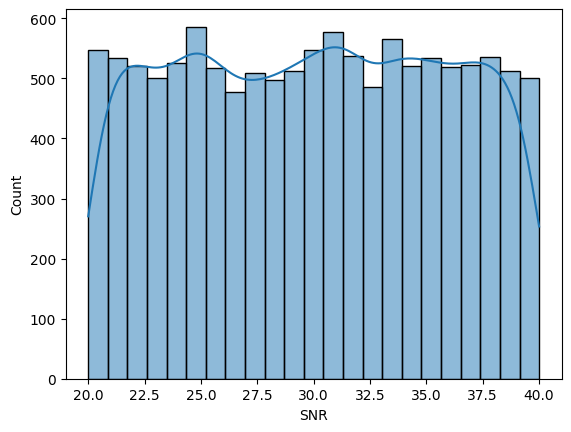

In [29]:
# observation['SNR'].plot(kind='hist', bins=23)
sns.histplot(observation['SNR'], bins=23, kde=True)
plt.show()

BP - Blood pressure (systolic diastolic mean)  
Value Range: 90/60–120/80 mmHg
```  
min         90.000000
max        120.000000
```  

In [30]:
print(f"Var BP: {observation['BP'].max():.6f}")
print(f"Median BP: {observation['BP'].min():.6f}")
observation['BP'].describe()

Var BP: 120.000000
Median BP: 90.000000


count    12088.000000
mean       104.606930
std          4.092904
min         90.000000
25%        101.862408
50%        104.615750
75%        107.344485
max        120.000000
Name: BP, dtype: float64

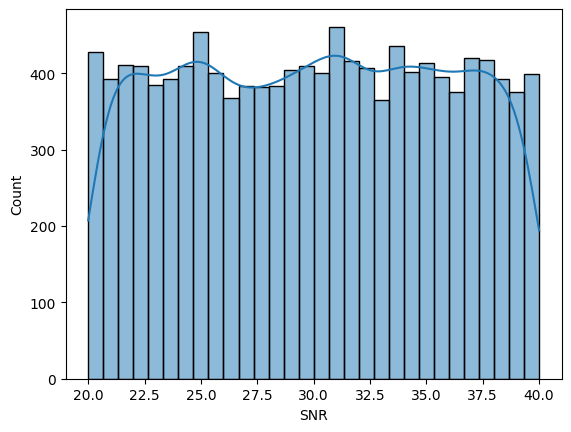

In [31]:
# observation['SNR'].plot(kind='hist', bins=30)
sns.histplot(observation['SNR'], bins=30, kde=True)
plt.show()

EtCO₂ - End-tidal carbon dioxide  
Value Range: 35–45 mmHg

In [32]:
print(f"Var EtCO₂: {observation['EtCO₂'].max():.6f}")
print(f"Median EtCO₂: {observation['EtCO₂'].min():.6f}")
observation['EtCO₂'].describe()

Var EtCO₂: 45.000000
Median EtCO₂: 35.000000


count    12088.000000
mean        39.531746
std          1.195541
min         35.000000
25%         38.732323
50%         39.525448
75%         40.334549
max         45.000000
Name: EtCO₂, dtype: float64

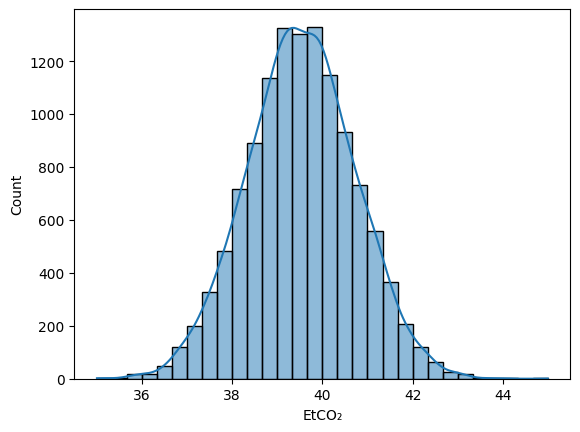

In [33]:
# observation['EtCO₂'].plot(kind='hist', bins=30)
sns.histplot(observation['EtCO₂'], bins=30, kde=True)
plt.show()

Hb level - Hemoglobin concentration  
Value Range: 12–18 g/dL

In [34]:
print(f"Var Hb level: {observation['Hb level'].max():.6f}")
print(f"Median Hb level: {observation['Hb level'].min():.6f}")
observation['Hb level'].describe()

Var Hb level: 18.000000
Median Hb level: 12.000000


count    12088.000000
mean        15.213171
std          1.042465
min         12.000000
25%         14.402970
50%         15.238357
75%         16.066035
max         18.000000
Name: Hb level, dtype: float64

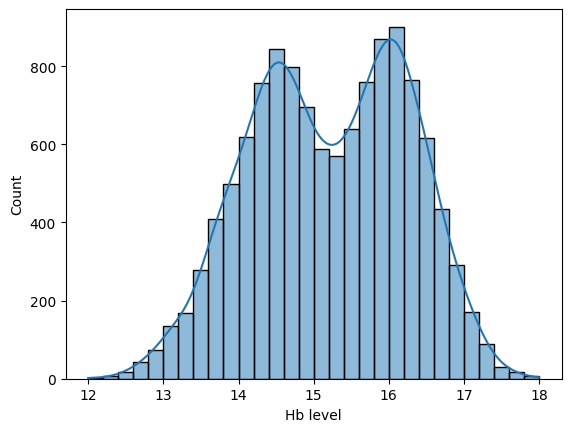

In [35]:
# observation['Hb level'].plot(kind='hist', bins=30)
sns.histplot(observation['Hb level'], bins=30, kde=True)
plt.show()

CO - Cardiac output  
Value Range: 4–8 L/min

In [36]:
print(f"Var CO: {observation['CO'].max():.6f}")
print(f"Median CO: {observation['CO'].min():.6f}")
observation['CO'].describe()

Var CO: 8.000000
Median CO: 4.000000


count    12088.000000
mean         4.169678
std          0.202979
min          4.000000
25%          4.062011
50%          4.109274
75%          4.199741
max          8.000000
Name: CO, dtype: float64

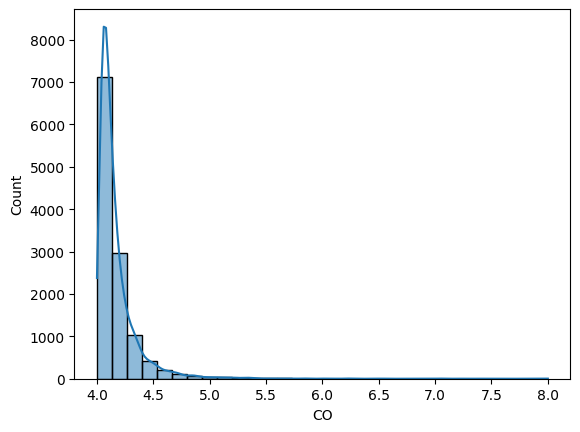

In [37]:
# observation['CO'].plot(kind='hist', bins=30)
sns.histplot(observation['CO'], bins=30, kde=True)
plt.show()

2. Patient

In [38]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ssn               2109 non-null   object
 1   job               633 non-null    object
 2   company           2109 non-null   object
 3   mail              2109 non-null   object
 4   address           1793 non-null   object
 5   name              2109 non-null   object
 6   birthdate         1160 non-null   object
 7   username          2109 non-null   object
 8   current_location  2004 non-null   object
 9   registration      2109 non-null   object
 10  blood_group       2109 non-null   object
 11  user_id           2109 non-null   int64 
 12  station_ID        2109 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 214.3+ KB


current_location, birthdate, address and job contain null values. The registration column does not have a consistent date format.

In [39]:
patient.head()

ssn                                    job         company  \
0       16079358484  Tecnólogo em produção Sucroalcooleira       Aparecida   
1       26108593415                                    NaN         da Cruz   
2       719-39-4782                                    NaN        合同会社松田運輸   
3       217-55-1186                                    NaN       長谷川電気有限会社   
4  DGLNNI79D10E171A                                    NaN  Pavone e figli   

                        mail  \
0  henry-gabriel43@ig.com.br   
1      melobenicio@ig.com.br   
2       rikakato@hotmail.com   
3         satomi76@yahoo.com   
4      gferragamo@hotmail.it   

                                             address                  name  \
0  Travessa Ana Lívia Campos, 91\nSanto André\n25...         Matteo da Paz   
1                                                NaN         Olívia Borges   
2                        青森県足立区京橋13丁目8番7号 クレスト四番町179                 加藤 和也   
3                                                NaN                山田 裕美子   
4    Rotonda Ariasso, 82\n30170, Venezia Mestre (VE)  Dott. Giovanna Gatto   

    birthdate      username                                 current_location  \
0         NaN  biancaaraujo  (Decimal('-76.8034745'), Decimal('-20.458717'))   
1  1953-03-05   guilherme39   (Decimal('67.895901'), Decimal('-127.389115'))   
2  1992-07-20     yoichiito   (Decimal('18.284540'), Decimal('-177.076638'))   
3         NaN  tanakaharuka   (Decimal('-68.872621'), Decimal('-46.050857'))   
4  2012-09-30     claudia38  (Decimal('-48.083341'), Decimal('-134.277595'))   

           registration blood_group  user_id  station_ID  
0            2023-01-02          B+     1184         138  
1  09/21/2023, 00:00:00          O-      866         240  
2            2023/04/18          B+     1041          48  
3           11 Jan 2023         AB-      867         674  
4            2020/11/21          B+      534         101

The data in the birthdate column looks correct. Of all records, the maximum freq is 2

In [40]:
patient['birthdate'].value_counts().sort_values(ascending=False).head()

birthdate
2013-05-15    2
1926-02-07    2
2019-08-10    2
2008-08-31    2
2022-04-09    2
Name: count, dtype: int64

In [41]:
# print(f"Youngest birthdate: {patient['birthdate'].sort_values(ascending=False).head(1)}")
# print(f"Oldest birthdate: {patient['birthdate'].sort_values(ascending=True).head(1)}")
bd = pd.to_datetime(patient['birthdate'])
print('Youngest birthdate:', bd.max().strftime('%Y-%m-%d'))
print('Oldest birthdate: ', bd.min().strftime('%Y-%m-%d'))

patient['birthdate'].describe()

Youngest birthdate: 2025-09-08
Oldest birthdate:  1909-10-08


count           1160
unique          1138
top       2001-10-27
freq               2
Name: birthdate, dtype: object

In [42]:
patient['blood_group'].describe()

count     2109
unique       8
top        AB-
freq       285
Name: blood_group, dtype: object

Existujuce hrupy krvi: 
```
AB-    285
B-     272
O+     264
A-     261
A+     260
AB+    259
B+     258
O-     250
```

<Axes: ylabel='count'>

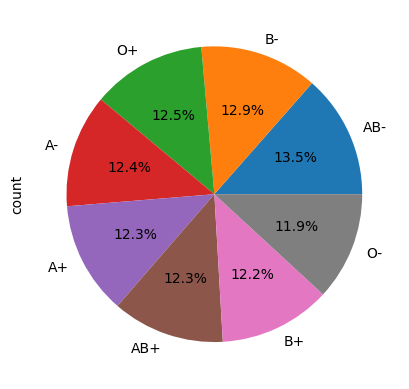

In [43]:
patient['blood_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')

3) Station 

In [44]:
station['QoS'].describe()

count      791
unique       4
top       good
freq       392
Name: QoS, dtype: object

In the next call we can ses, thst column QoS has destrbution with only 4 values:
```
QoS  
good           392
excellent      246
acceptable     117
maintenance     36
```

In [45]:
station['QoS'].value_counts()

QoS
good           392
excellent      246
acceptable     117
maintenance     36
Name: count, dtype: int64

<Axes: ylabel='count'>

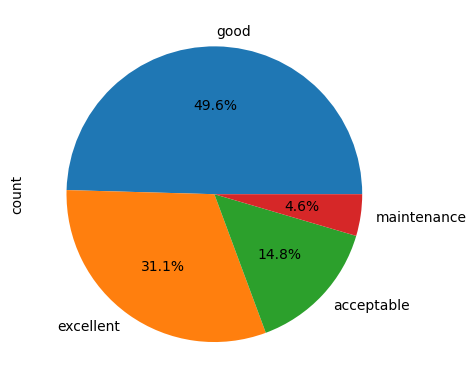

In [46]:
station['QoS'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [47]:
station['station'].describe()

count          791
unique         527
top       Valinhos
freq             5
Name: station, dtype: object

In [48]:
# Number of recordings with specific stations 
station['station'].value_counts()

station
Valinhos                   5
Zhoushan                   5
San Fernando de Henares    5
Parola                     5
Nutley                     4
                          ..
Nampa                      1
Taozhuang                  1
Jersey City                1
Wangon                     1
Bua Yai                    1
Name: count, Length: 527, dtype: int64

In [49]:
station['location'].describe()

count                  791
unique                 135
top       America/New_York
freq                    56
Name: location, dtype: object

In [50]:
# Number of recordings with specific locations 
station['location'].value_counts()

location
America/New_York                  56
Asia/Kolkata                      56
America/Chicago                   44
Europe/Moscow                     32
America/Los_Angeles               32
                                  ..
America/Phoenix                    1
America/Managua                    1
America/Boise                      1
America/Argentina/Buenos_Aires     1
Africa/Banjul                      1
Name: count, Length: 135, dtype: int64

In [51]:
# Table showing station location and quality of service
locations_stats = station.groupby(['location', 'QoS']).size().unstack(fill_value=0)
locations_stats

QoS                   acceptable  excellent  good  maintenance
location                                                      
Africa/Abidjan                 0          0     1            0
Africa/Accra                   0          1     2            1
Africa/Addis_Ababa             0          0     1            0
Africa/Algiers                 0          3     6            0
Africa/Banjul                  0          0     1            0
...                          ...        ...   ...          ...
Europe/Zaporozhye              0          0     0            1
Europe/Zurich                  0          0     1            0
Indian/Antananarivo            0          0     1            0
Pacific/Auckland               0          0     1            0
Pacific/Port_Moresby           1          0     0            0

[135 rows x 4 columns]

In [52]:
locations_stats['excellent'].sort_values(ascending=False).head(5)

location
Asia/Kolkata        17
Europe/Berlin       15
Asia/Shanghai       14
America/Chicago     13
America/New_York    12
Name: excellent, dtype: int64

In [53]:
locations_stats['good'].sort_values(ascending=False).head(5)

location
America/New_York       32
Asia/Kolkata           27
Europe/Paris           18
America/Chicago        18
America/Los_Angeles    17
Name: good, dtype: int64

The first problem we see below is the lack of a common date record format. With this data set, we can't work right now.

In [54]:
station['revision'].describe()

count            791
unique           772
top       2019/11/02
freq               2
Name: revision, dtype: object

In [55]:
station['revision'].value_counts().head()

revision
2019/11/02              2
10 Apr 2024             2
2021/10/01              2
10/19/2017, 00:00:00    2
2016-01-12              2
Name: count, dtype: int64

<Axes: ylabel='Density'>

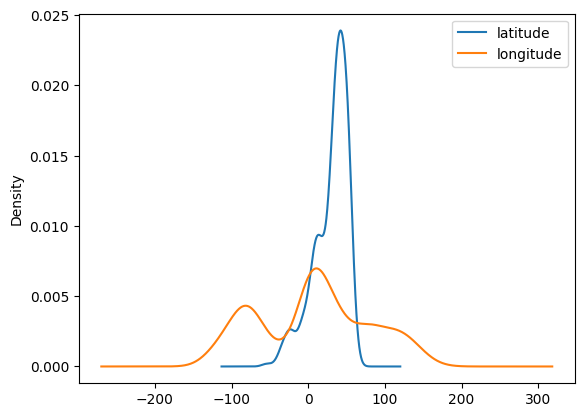

In [56]:
station[['latitude', 'longitude']].plot(kind='density')

---

(C-1b) Pairwise Data Analysis: Identify relationships and dependencies between pairs of attributes.

1) Observation

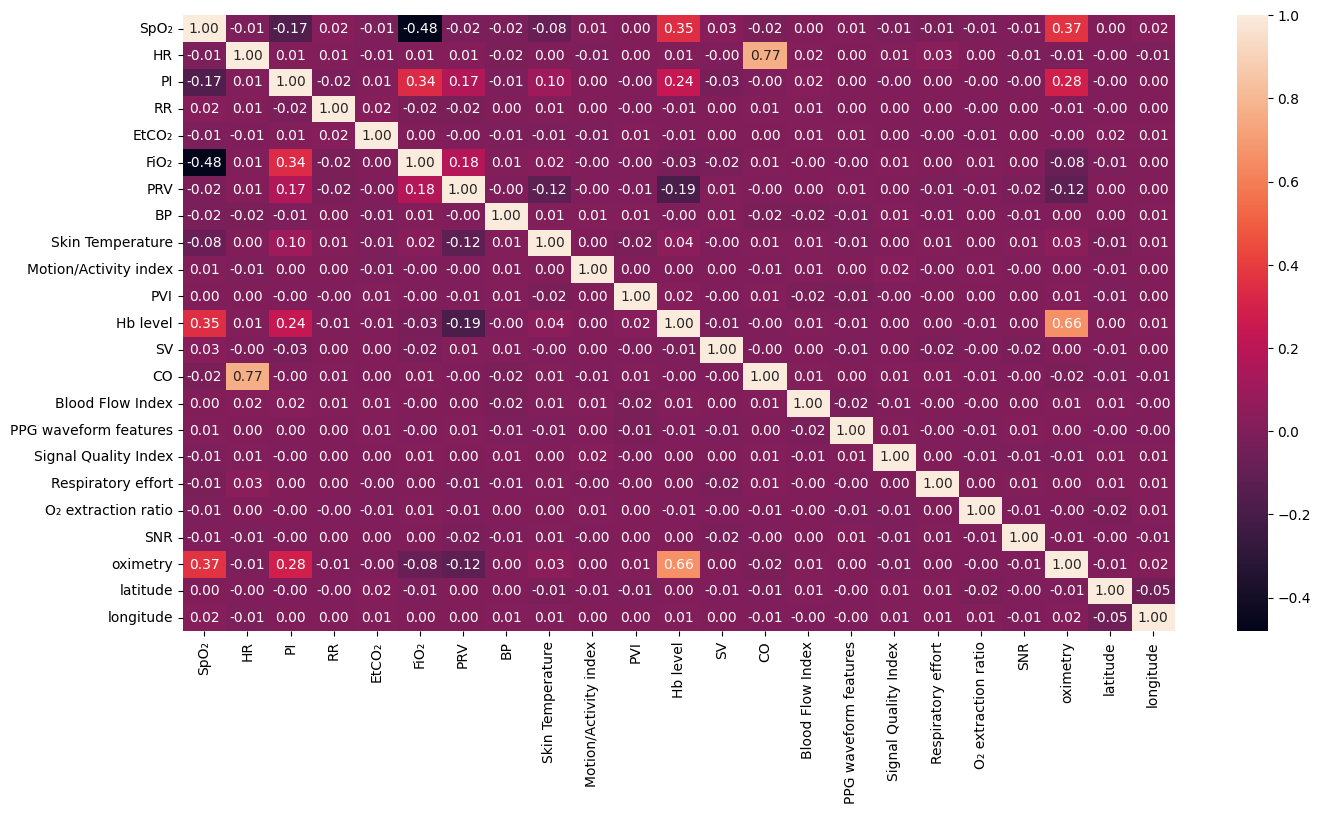

In [57]:
plt.figure(figsize=(16,8))
sns.heatmap(
    observation[['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'PRV', 'BP', 'Skin Temperature', 'Motion/Activity index', 'PVI', 'Hb level', 'SV', 'CO', 'Blood Flow Index', 'PPG waveform features', 'Signal Quality Index', 'Respiratory effort', 'O₂ extraction ratio', 'SNR', 'oximetry', 'latitude', 'longitude']].corr(),
    annot=True, 
    fmt=".2f"
)
plt.show()

On the heatmap we can observe linear dependencies among most of the parameters in the Observation dataset, which suggests that the attributes selected in the previous step may not have been fully optimal.

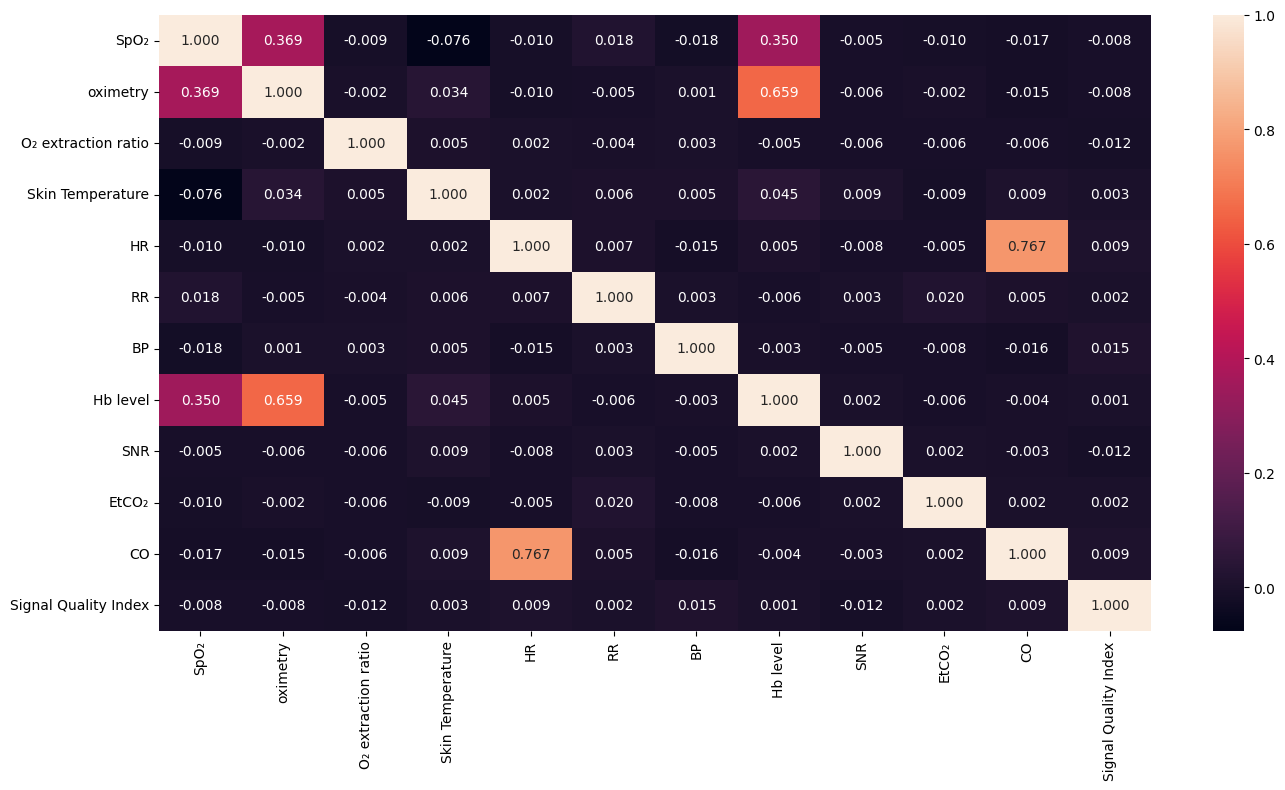

In [58]:
plt.figure(figsize=(16,8))
sns.heatmap(
    observation[
        [
            'SpO₂', 'oximetry', 'O₂ extraction ratio', 'Skin Temperature',
            'HR', 'RR', 'BP', 'Hb level', 'SNR', 'EtCO₂',
            'CO', 'Signal Quality Index'
        ]
    ].corr(),
    annot=True,
    fmt=".3f"
)
plt.show()

As we can see HR and CO have a strong linear dependence, as well as Hb level & SpO2 and oximetry & SpO₂.

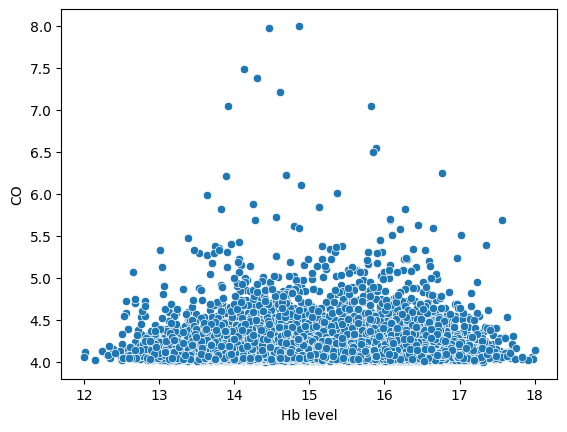

In [59]:
sns.scatterplot(data=observation, x="Hb level", y="CO")
plt.show()

There's no dependence, or if there is, it's negligible

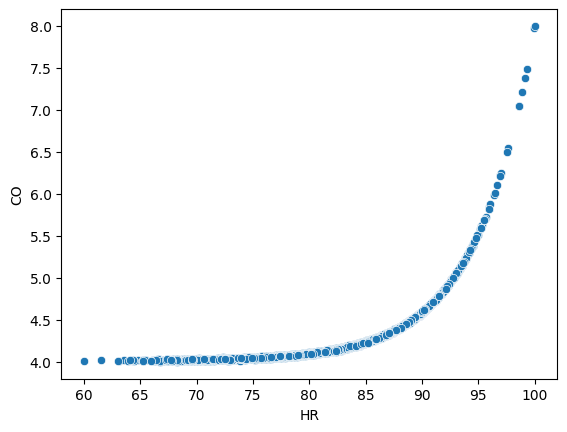

In [60]:
sns.scatterplot(data=observation, x="HR", y="CO")
plt.show()

The graph shows that, as HR increases, cardiac output (CO) also increases. There is a strong positive correlation between HR and CO. 

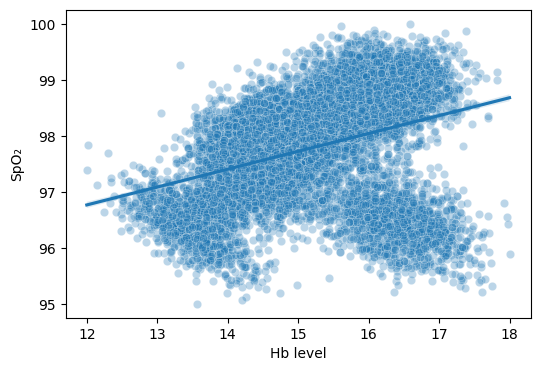

In [61]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=observation, x='Hb level', y='SpO₂', alpha=0.3)
sns.regplot(data=observation, x='Hb level', y='SpO₂', scatter=False, ci=95)
plt.show()


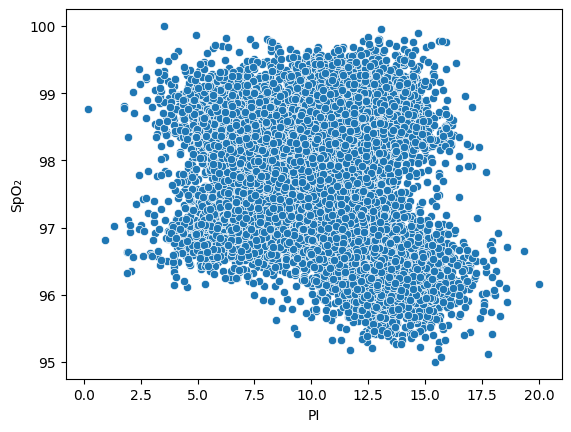

In [62]:
sns.scatterplot(data=observation, x="PI", y="SpO₂")
plt.show()

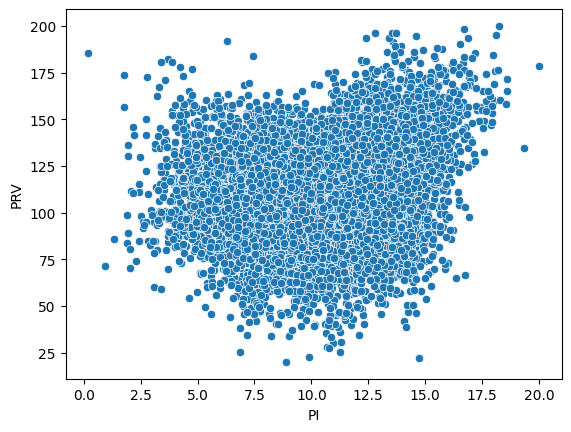

In [63]:
sns.scatterplot(data=observation, x="PI", y="PRV")
plt.show()

Hb level and SpO₂ are related but not directly

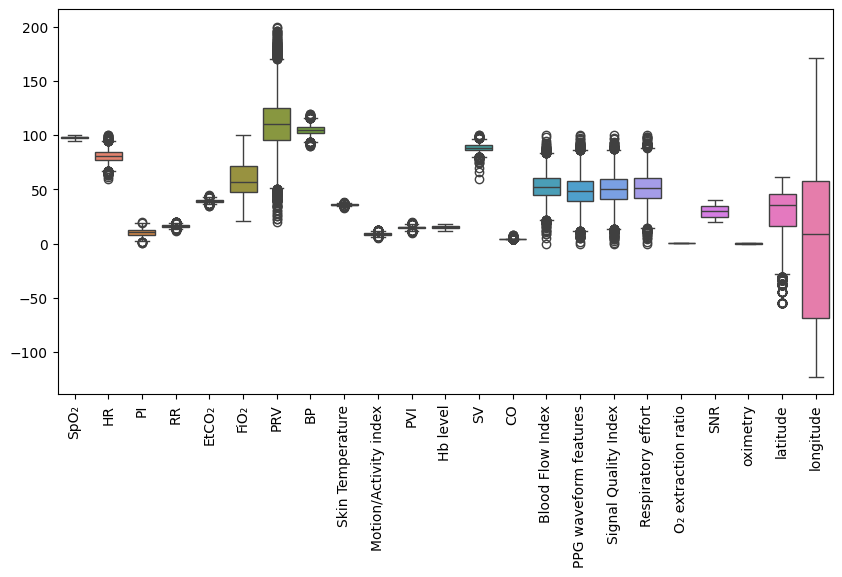

In [64]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(
            data=observation)
pylab.xticks(rotation=90)
plt.show()


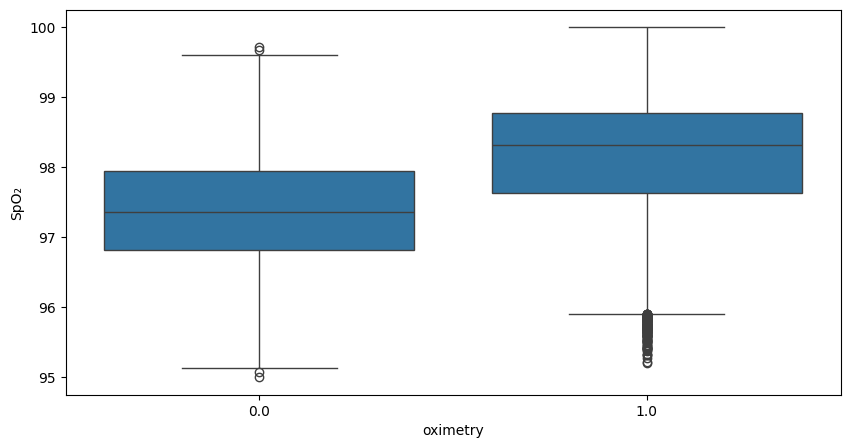

In [65]:
sns.boxplot(data=observation, x="oximetry", y="SpO₂")
plt.show()

At oximetry = 0.0 the median is somewhere in the range of 97.4 and the range is basically 96.8-97.9%.
At oximetry = 1.0, the median is somewhere in the range 98.2 u and the range is mostly 97.6-99.9%.

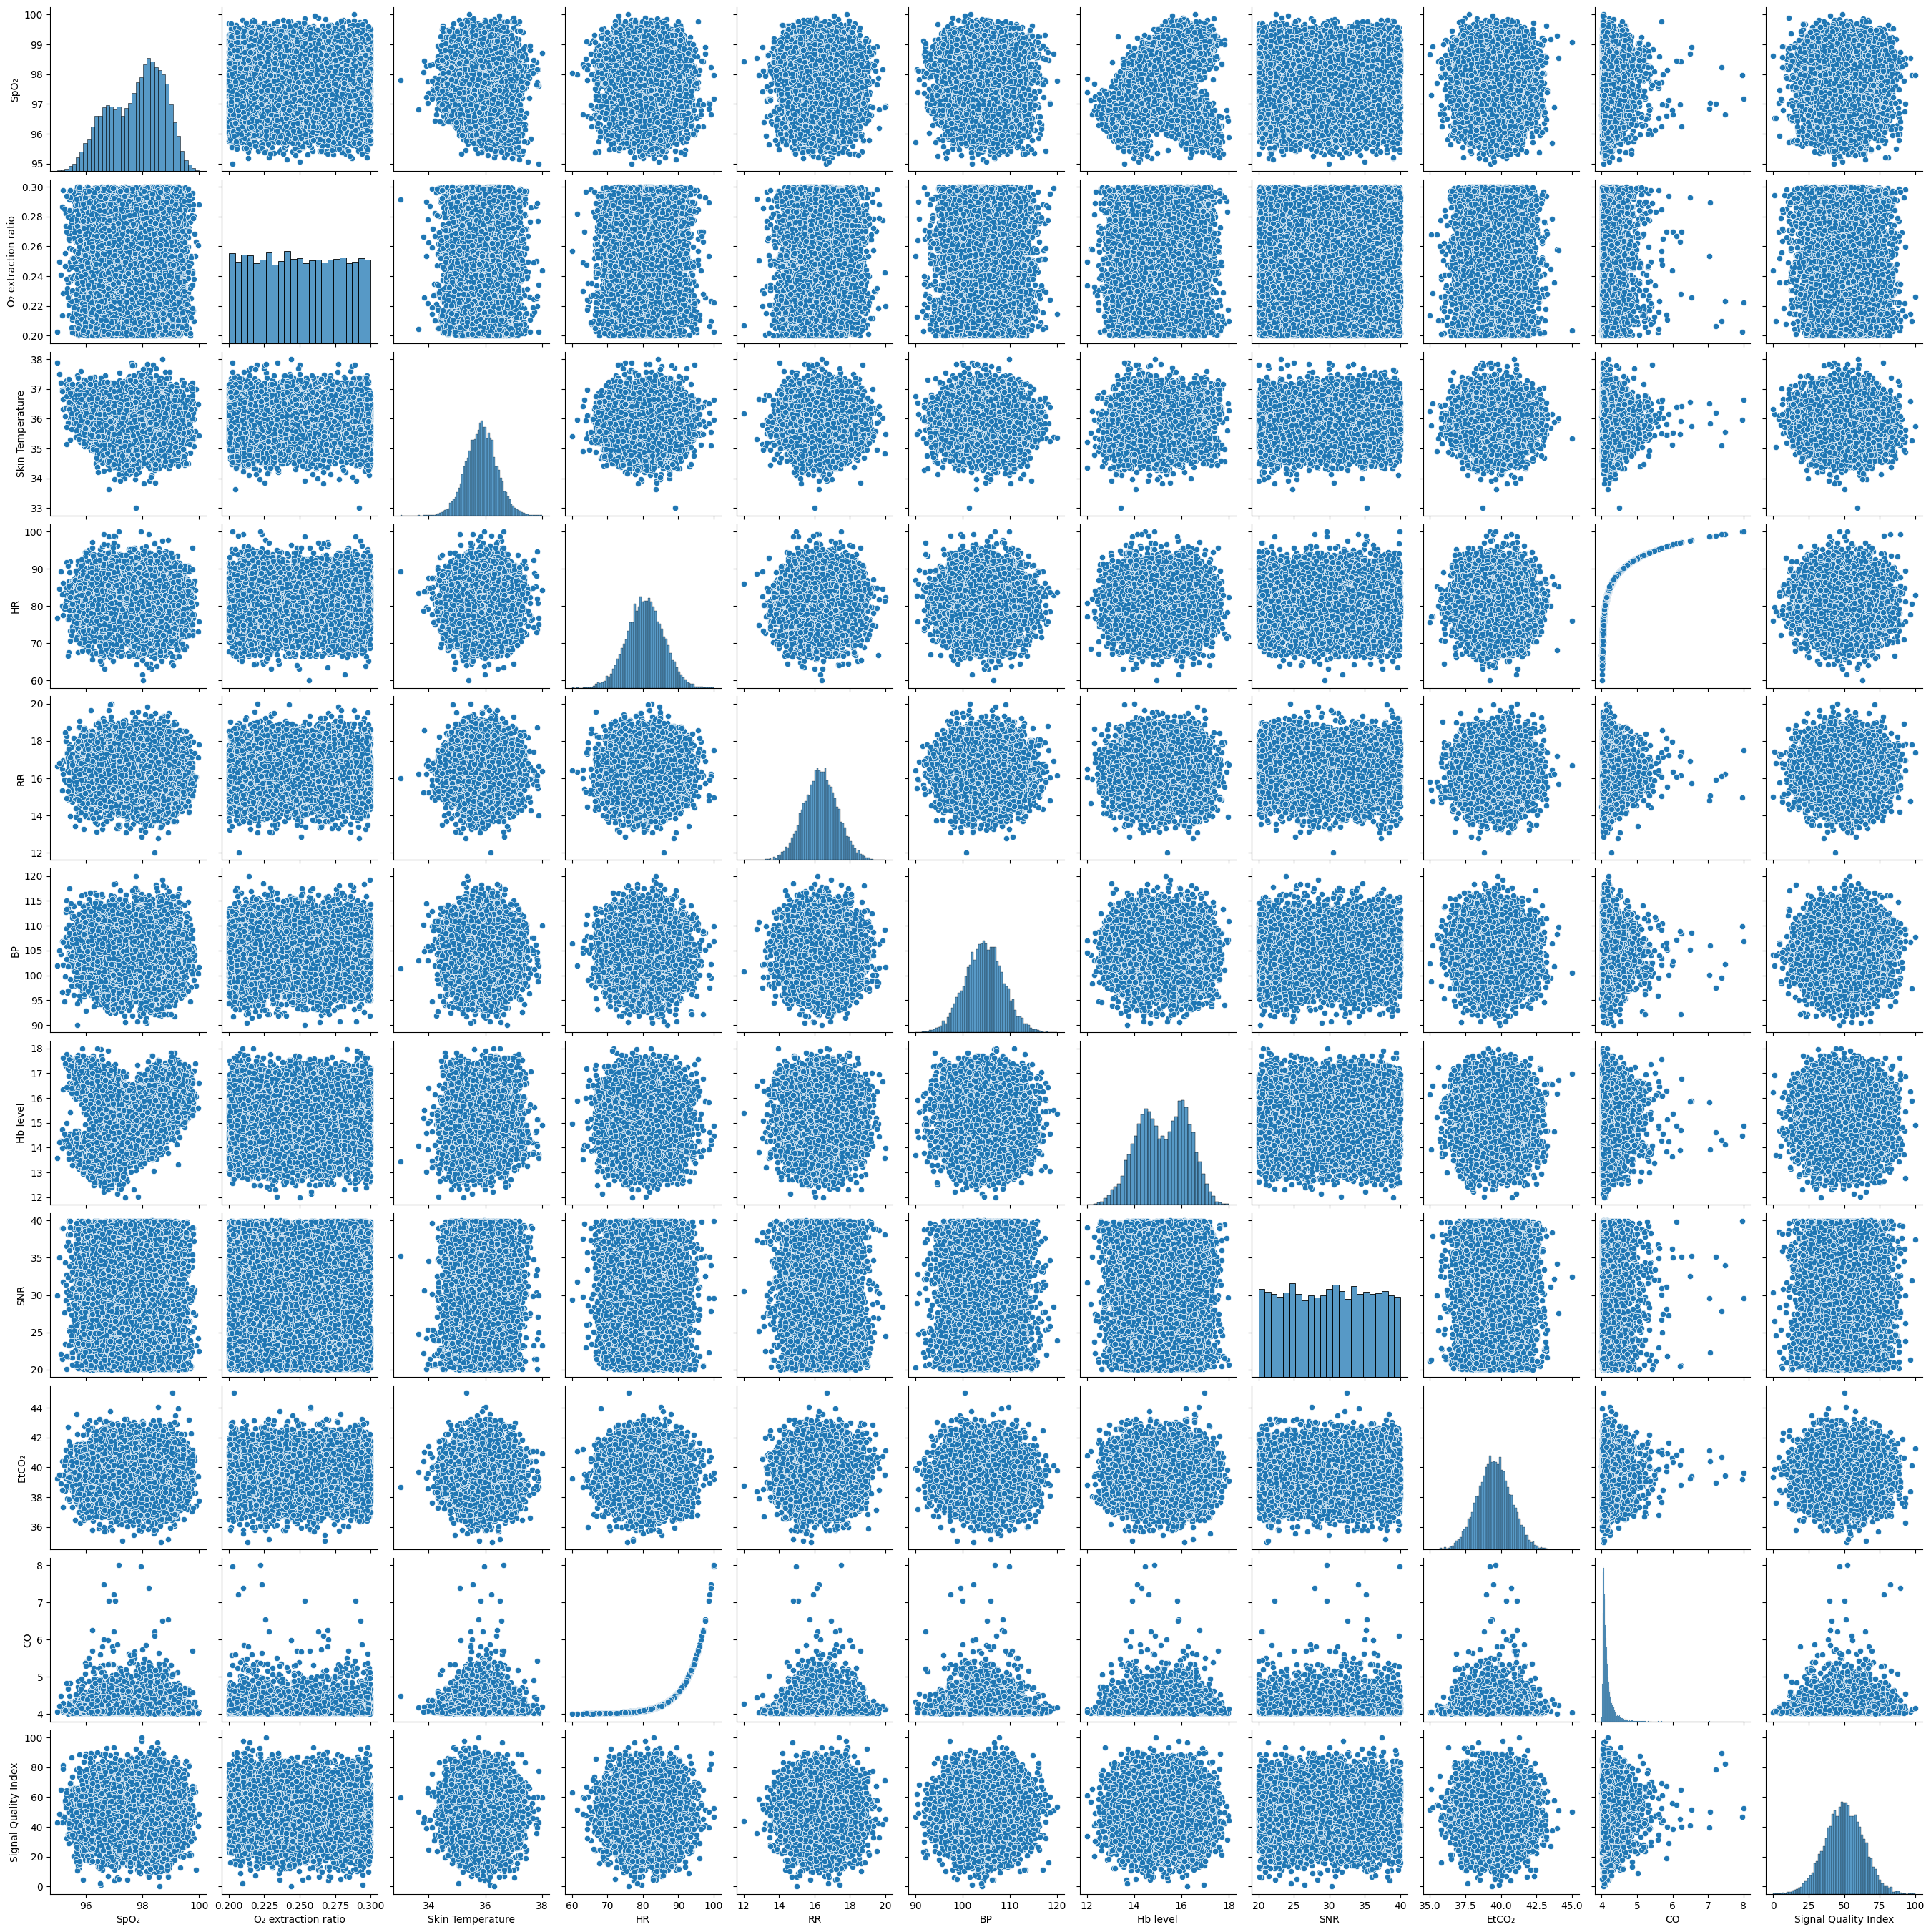

In [66]:
sns.pairplot(observation[[
    "SpO₂", "O₂ extraction ratio", "Skin Temperature", 
    "HR", "RR", "BP", "Hb level", "SNR", "EtCO₂", 
    "CO", "Signal Quality Index"
]].dropna())


In this part we studied dependencies between attributes. The dependencies between with the attributes selected in the second part: oximetry & SpO₂, HR & CO, Hb level & SpO₂, Hb level & CO. from those that were not selected in the second part: SpO₂ & PI, Pi & PRV

SpO₂ - Peripheral oxygen saturation  
HR - Heart rate from pulse oximeter  
CO - Cardiac output  
Hb level - Hemoglobin concentration  
PI - Perfusion index  

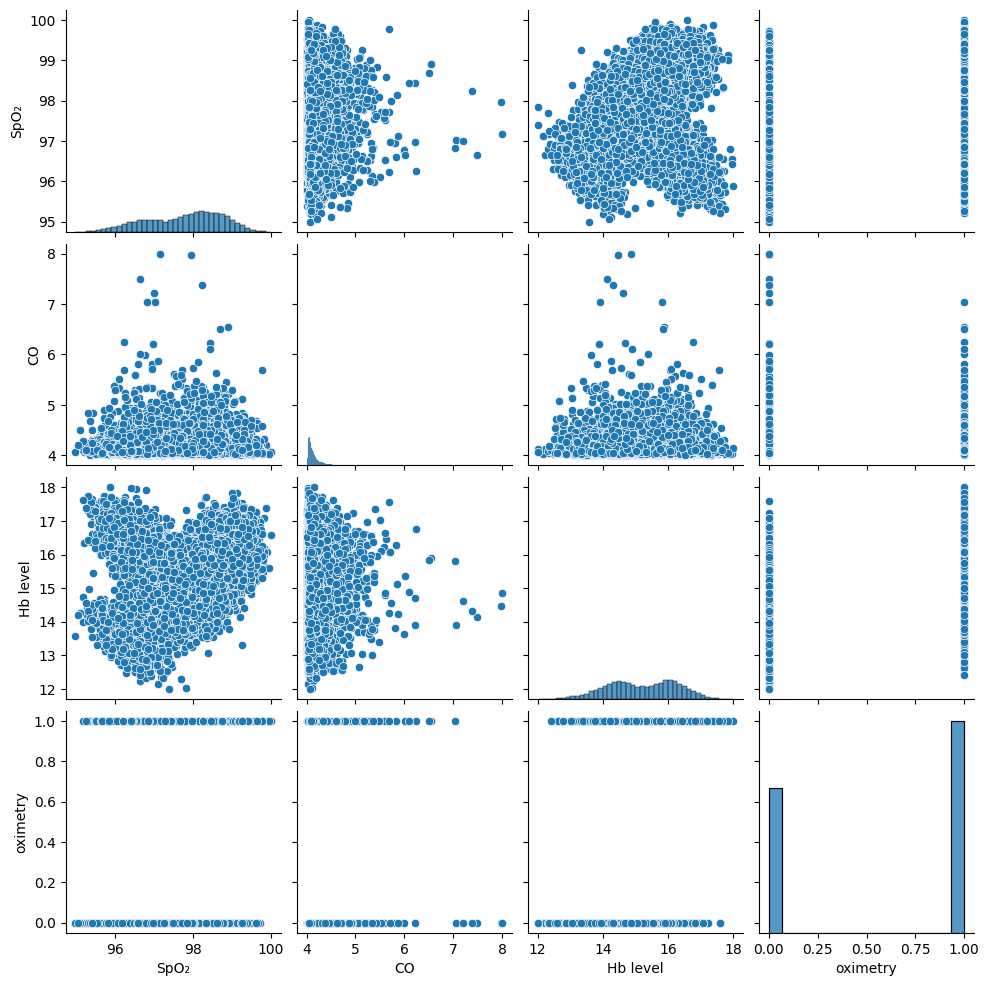

In [67]:
sns.pairplot(observation.dropna()[[
        'SpO₂', 'CO', 'Hb level', 'oximetry'
]])

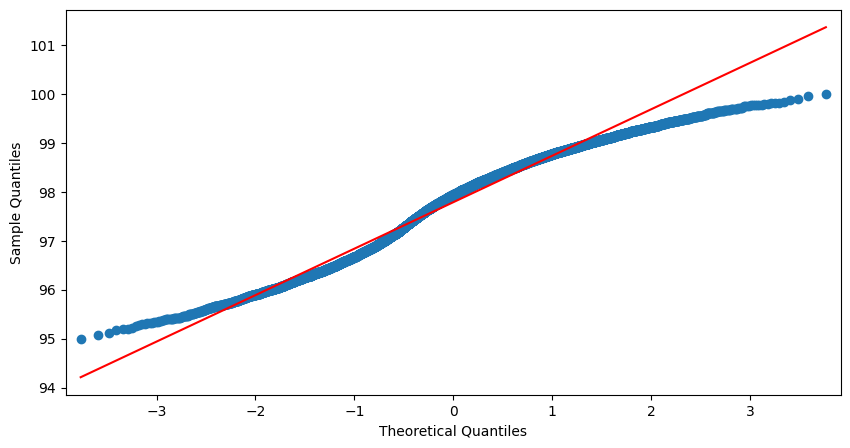

In [68]:
sm.qqplot(observation["SpO₂"], line='s')
py.show()

SpO₂ data distribution

2. Patient

As we noticed earlier, the birthdate column has null values. 

In [69]:
birthdate_year = pd.to_datetime(patient['birthdate']).dt.year
birthdate_month = pd.to_datetime(patient['birthdate']).dt.month
birthdate_day = pd.to_datetime(patient['birthdate']).dt.day

Create crosstab - allows calculate how often combinations of values of variables occur.

In [70]:
birthdate_year_ct = pd.crosstab(birthdate_year, patient['blood_group'], normalize='index')
birthdate_month_ct = pd.crosstab(birthdate_month, patient['blood_group'], normalize='index')
birthdate_day_ct = pd.crosstab(birthdate_day, patient['blood_group'], normalize='index')

<Axes: ylabel='count'>

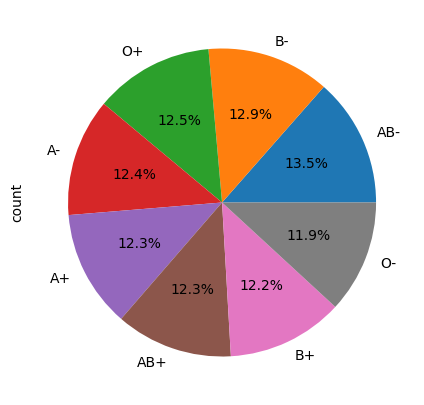

In [71]:
patient['blood_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')

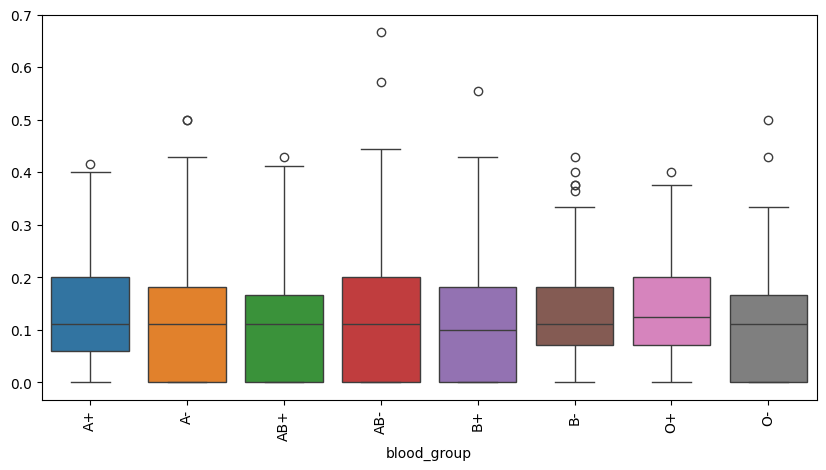

In [72]:
plt.rcParams["figure.figsize"] = (10,5)
sns.boxplot(
            data=birthdate_year_ct)
pylab.xticks(rotation=90)
plt.show()
# Distribution of blood group proportions by year.

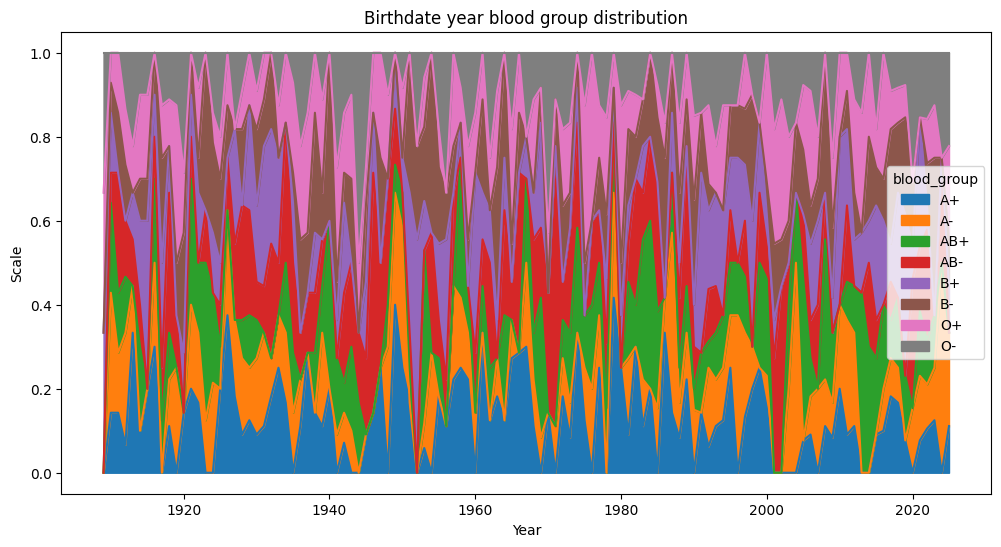

In [73]:
# Bloods groups by year of birthdate
birthdate_year_ct.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title("Birthdate year blood group distribution")
plt.xlabel("Year")
plt.ylabel("Scale")
plt.show()

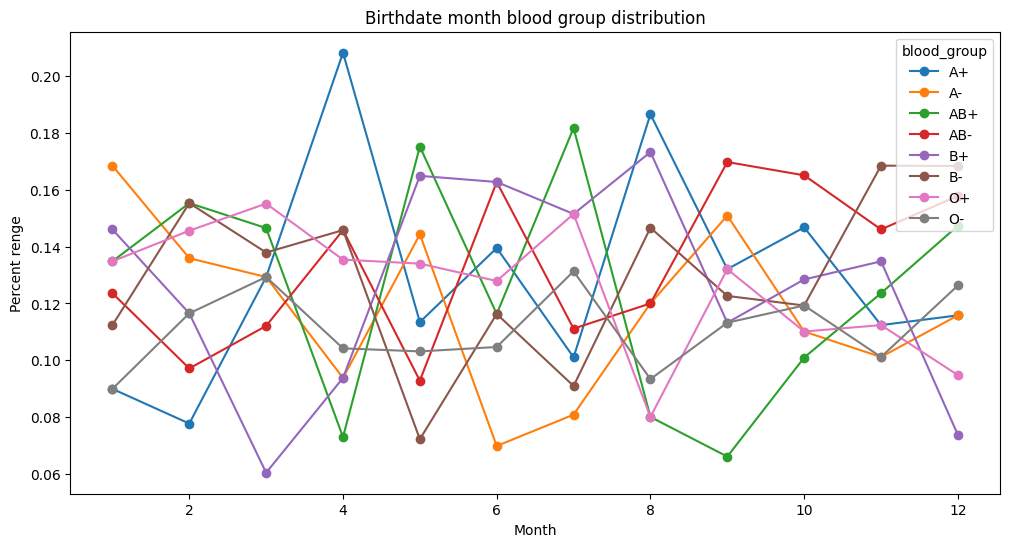

In [74]:
birthdate_month_ct.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Birthdate month blood group distribution")
plt.xlabel("Month")
plt.ylabel("Percent renge")
plt.show()

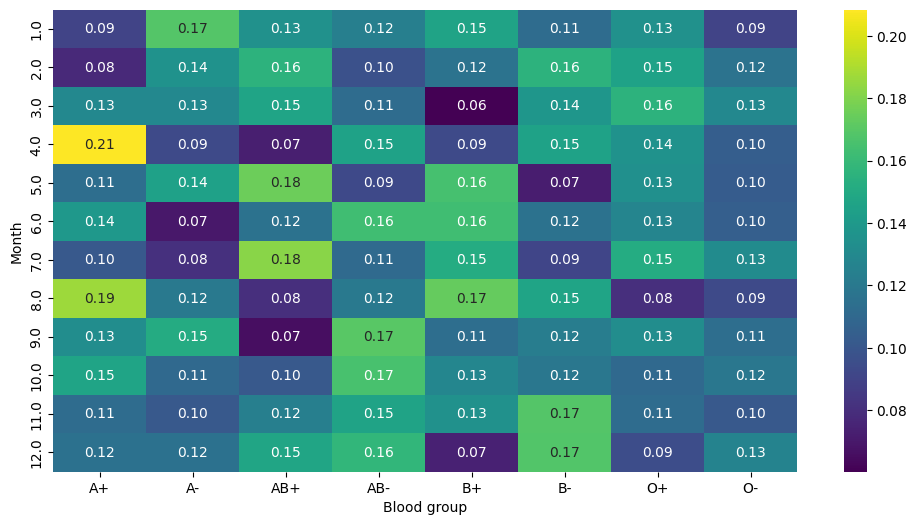

In [75]:
plt.figure(figsize=(12,6))
sns.heatmap(birthdate_month_ct, annot=True, fmt='.2f', cmap='viridis')
plt.xlabel('Blood group'); 
plt.ylabel('Month'); 
plt.show()

In this figure we can clearly see the distribution of blood by date of birth.   
As we can see from our dataset, people born in the 4th month are more likely to have blood type A+.

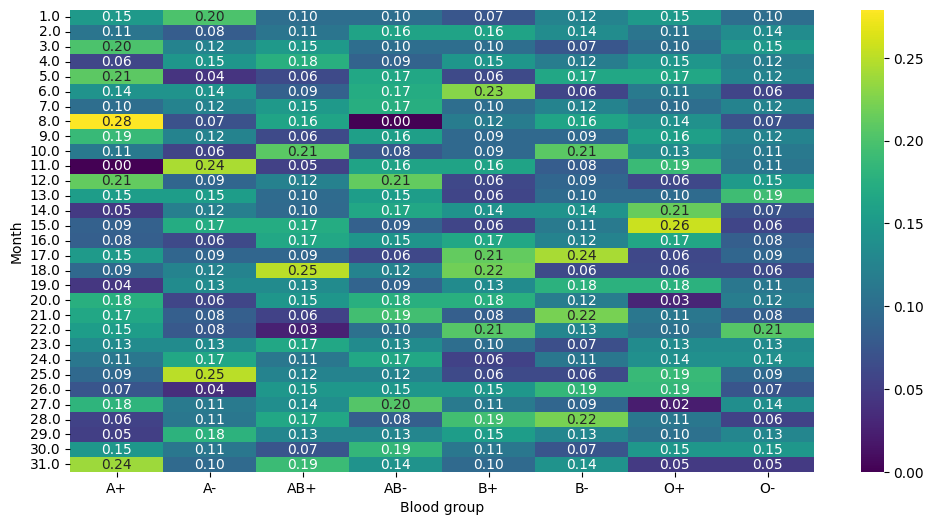

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(birthdate_day_ct, annot=True, fmt='.2f', cmap='viridis')
plt.xlabel('Blood group'); 
plt.ylabel('Month'); 
plt.show()

In this section we analyzed the distribution of birthdates across years, months, and days, and compared these patterns with blood group.

3. Station


In this section we analyzed: QoS, station, location

<Axes: ylabel='Density'>

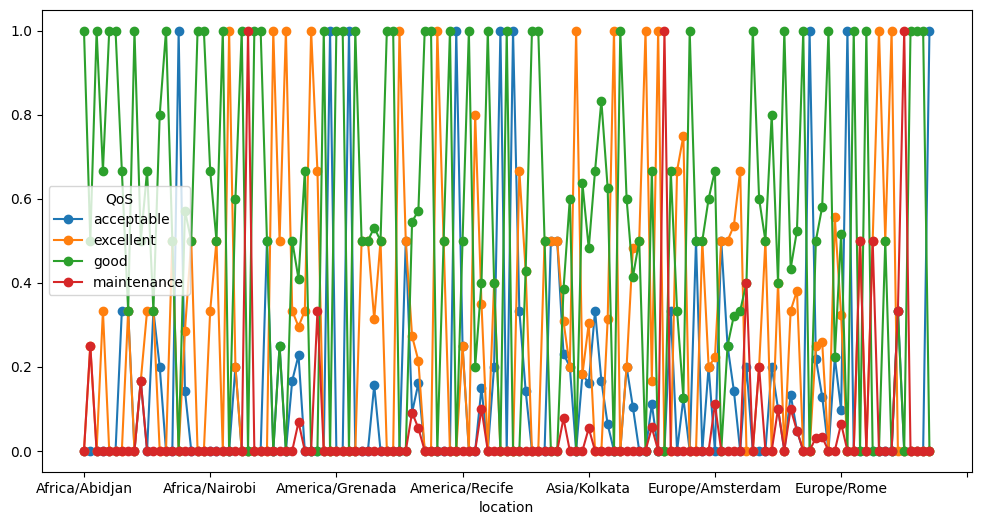

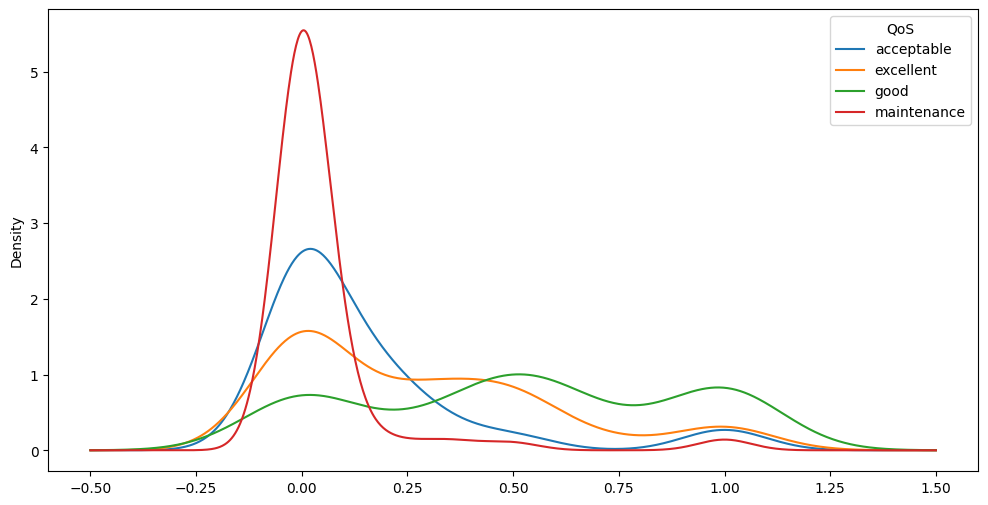

In [77]:
location_ct = pd.crosstab(station['location'], station['QoS'], normalize='index')
location_ct.plot(kind='line', marker='o', figsize=(12,6))
location_ct.plot(kind='density', figsize=(12,6))

Locations with more than 5 records

<Axes: xlabel='location'>

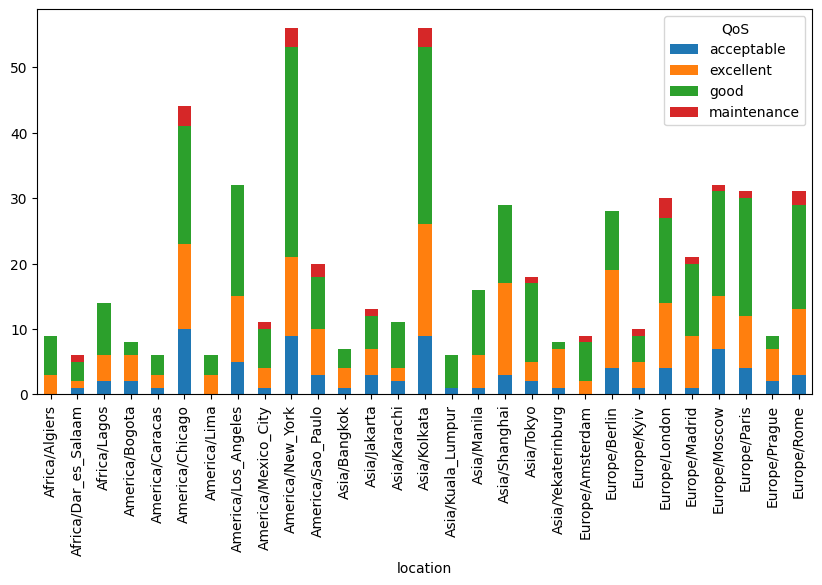

In [78]:
location_counts = station["location"].value_counts()
locations_with_more_than_5 = location_counts[location_counts > 5].index

# Filter the station
filtered_station = station[station["location"].isin(locations_with_more_than_5)]

pd.crosstab(filtered_station["location"], filtered_station["QoS"]).plot.bar(stacked=True)

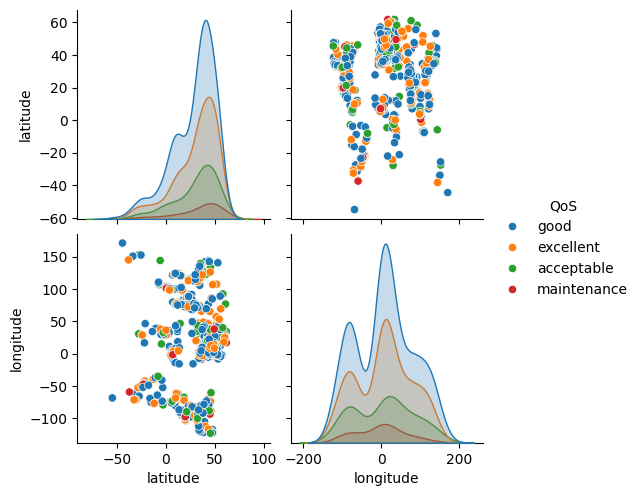

In [79]:
sns.pairplot(station, hue="QoS")

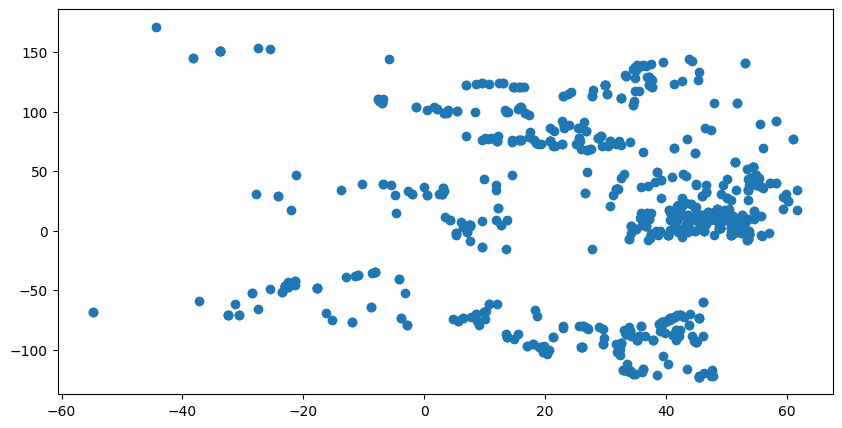

In [80]:
plt.scatter(station.latitude, station.longitude)

In this section we analyzed the distribution of QoS levels in relation to station and location.

---

(D-1b) Pairwise data analysis: identify the relationships between the predicted variable and 
other variables (potential predictors). 

A predicted variable - oximetry

<Axes: ylabel='Frequency'>

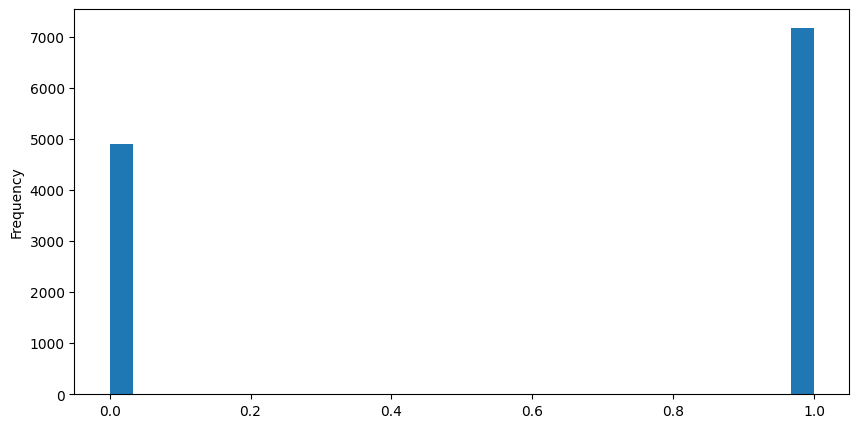

In [81]:
observation['oximetry'].plot(kind='hist', bins=30)

In [82]:
observation_corr = observation.corr()['oximetry'].sort_values(ascending=False)
observation_corr

oximetry                 1.000000
Hb level                 0.659248
SpO₂                     0.369079
PI                       0.282873
Skin Temperature         0.034027
longitude                0.016061
PVI                      0.011211
Blood Flow Index         0.010482
Respiratory effort       0.002313
Motion/Activity index    0.001667
SV                       0.001007
BP                       0.000766
PPG waveform features    0.000245
EtCO₂                   -0.001691
O₂ extraction ratio     -0.002351
RR                      -0.005341
latitude                -0.005828
SNR                     -0.005873
Signal Quality Index    -0.007549
HR                      -0.009884
CO                      -0.015197
FiO₂                    -0.084362
PRV                     -0.116775
Name: oximetry, dtype: float64

As we can see, SpO₂ has a carrelation with the:
Hb level                 0.659248  
SpO₂                     0.369079  
PI                       0.282873  
Skin Temperature         0.034027  
...  
FiO₂                    -0.084362  
PRV                     -0.116775   

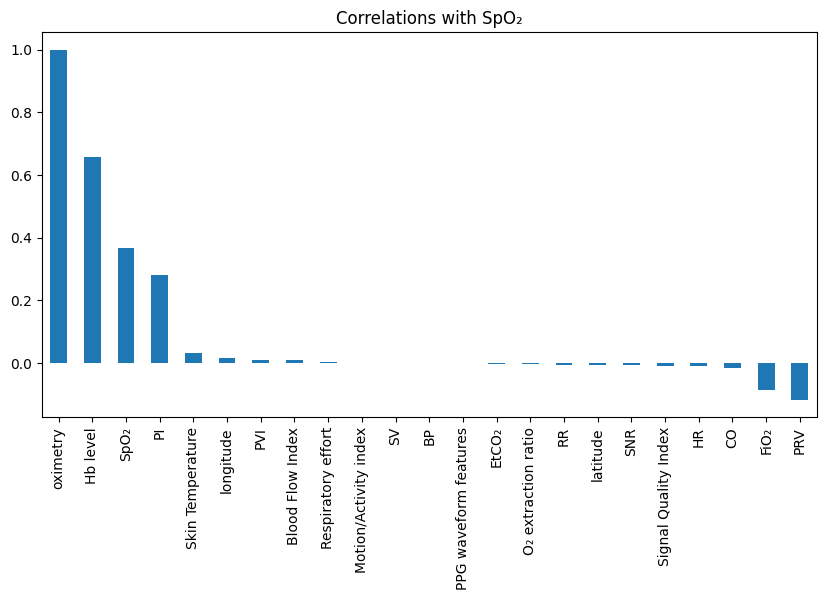

In [83]:
observation_corr.plot(kind='bar', title='Correlations with SpO₂')
plt.show()

The graph shows that oximetry has: significant 
positive correlation with Hb level, SpO₂, PI and negative correlation with PRV, FiO₂. Possible positive correlation with Skin Temperature.

Let's vizualize dependencies

<Axes: xlabel='oximetry', ylabel='SpO₂'>

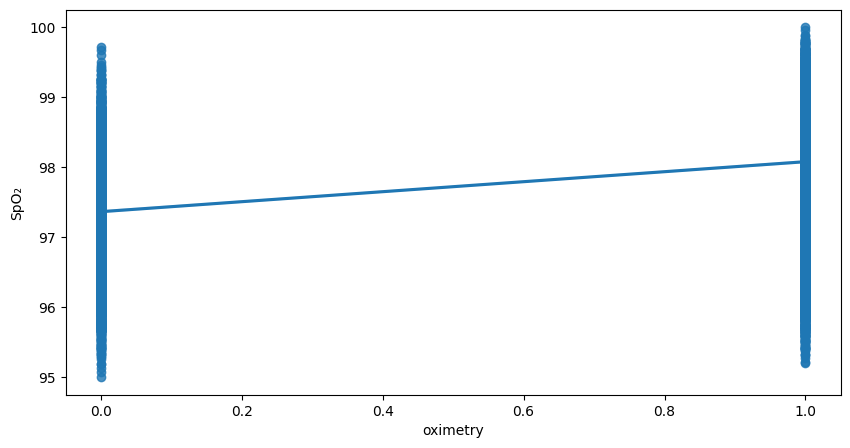

In [84]:
sns.regplot(data=observation, x='oximetry', y='SpO₂')

<Axes: xlabel='oximetry', ylabel='SpO₂'>

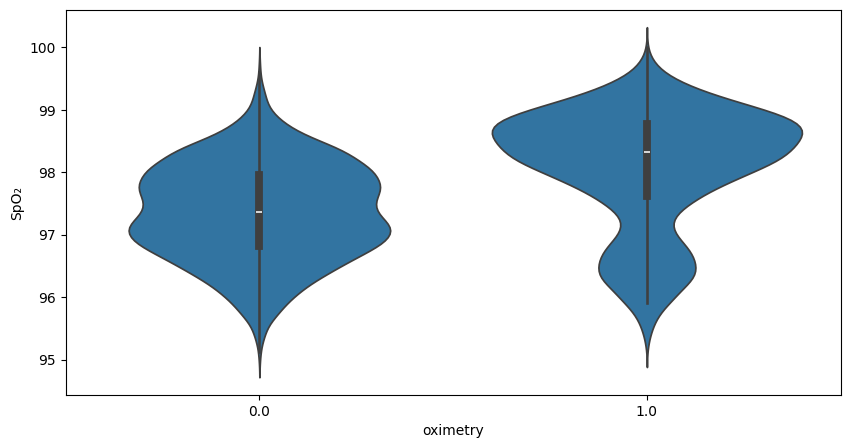

In [85]:
sns.violinplot(data=observation, x='oximetry', y='SpO₂')

<Axes: xlabel='oximetry', ylabel='Hb level'>

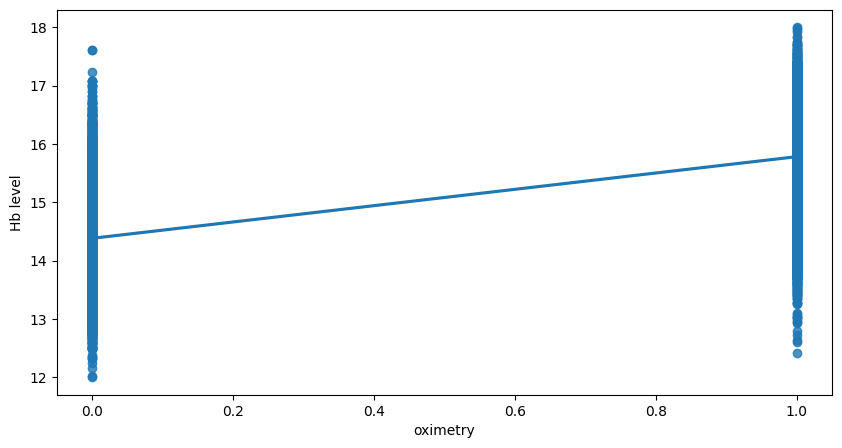

In [86]:
sns.regplot(data=observation, x='oximetry', y='Hb level')

<Axes: xlabel='oximetry', ylabel='PI'>

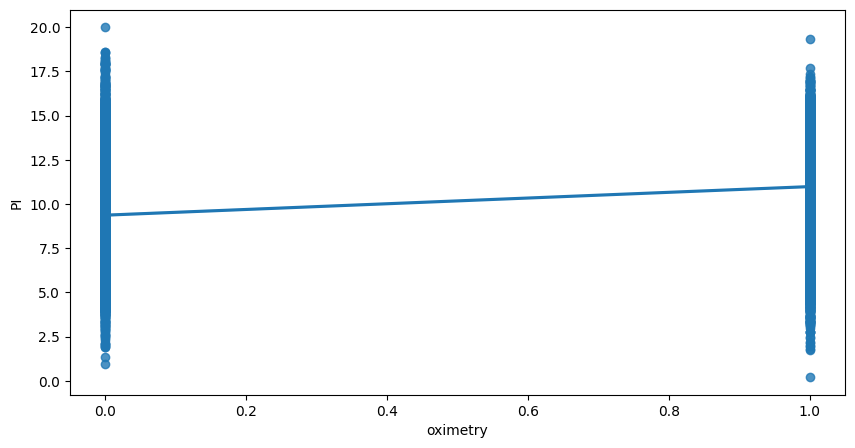

In [87]:
sns.regplot(data=observation, x='oximetry', y='PI')

<Axes: xlabel='oximetry', ylabel='Skin Temperature'>

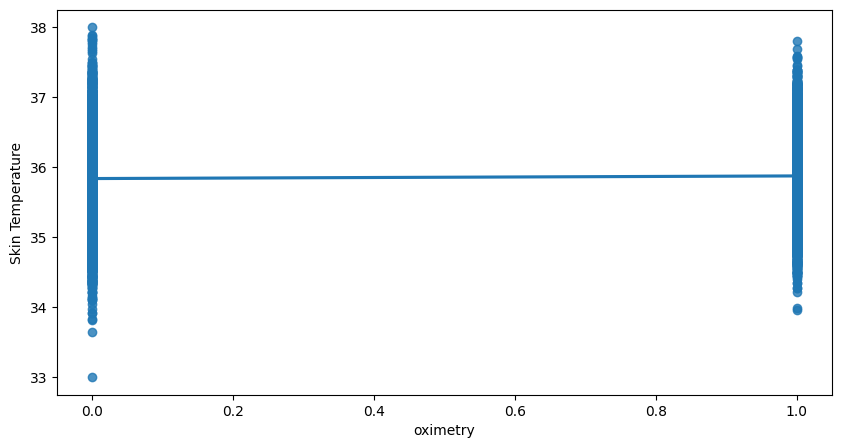

In [88]:
sns.regplot(data=observation, x='oximetry', y='Skin Temperature')

And a pretty weak correlation between oximetry and Skin Temperature, if any at all. 

<Axes: xlabel='oximetry', ylabel='PRV'>

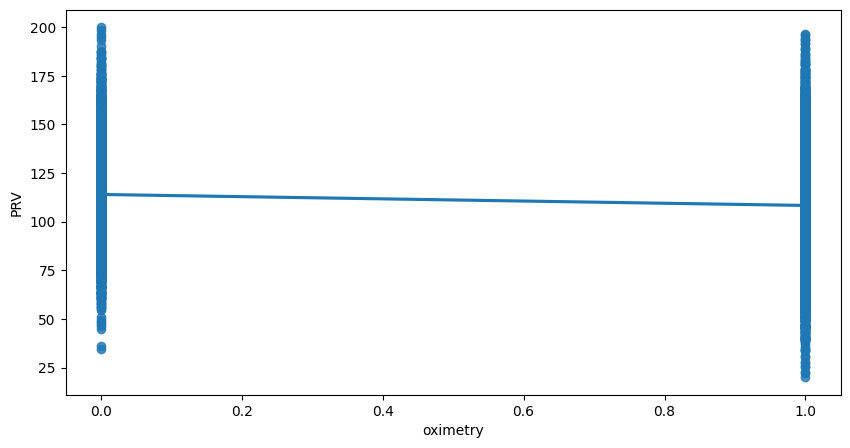

In [89]:
sns.regplot(data=observation, x='oximetry', y='PRV')

<Axes: xlabel='oximetry', ylabel='FiO₂'>

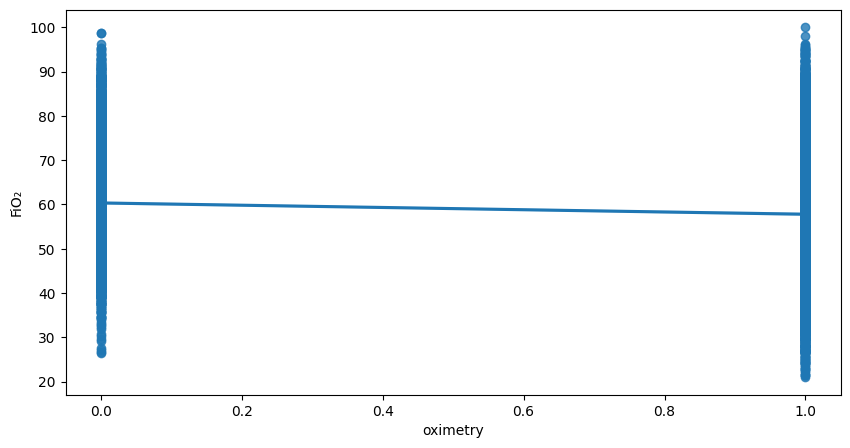

In [90]:
sns.regplot(data=observation, x='oximetry', y='FiO₂')

<Axes: >

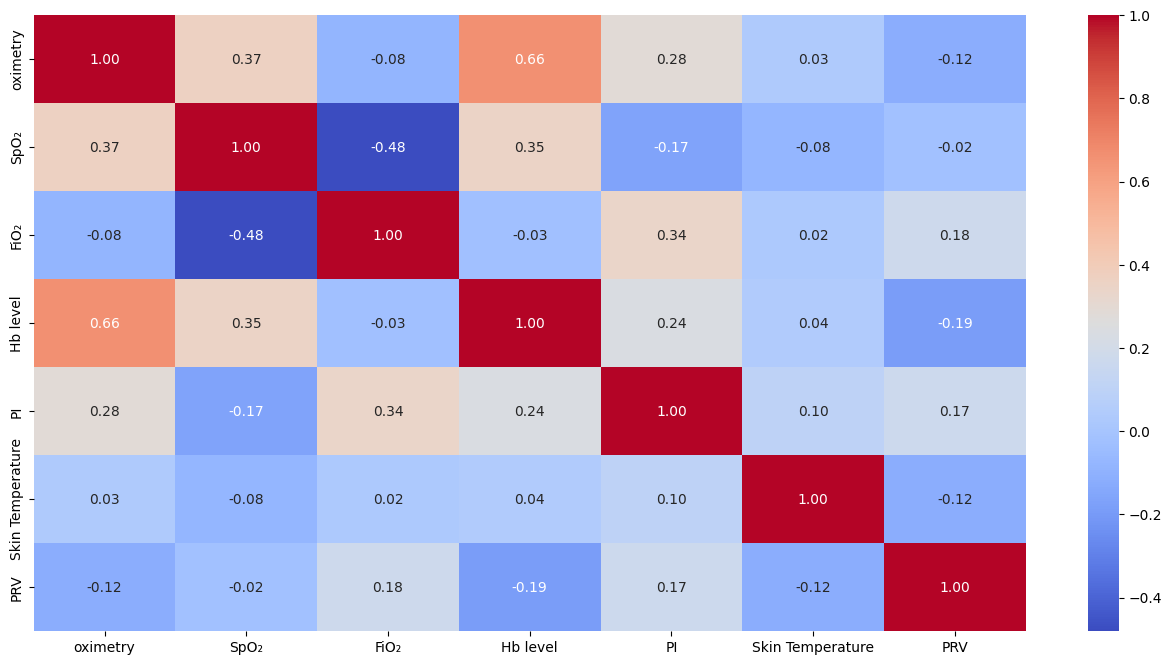

In [91]:
fig, ax = plt.subplots(figsize=(16,8))
top_variables = ["oximetry", "SpO₂", "FiO₂", "Hb level", "PI", "Skin Temperature", "PRV"]
sns.heatmap(observation[top_variables].corr(), annot=True, fmt=".2f", cmap="coolwarm")

This table shows the basic dependencies between key attributes. 

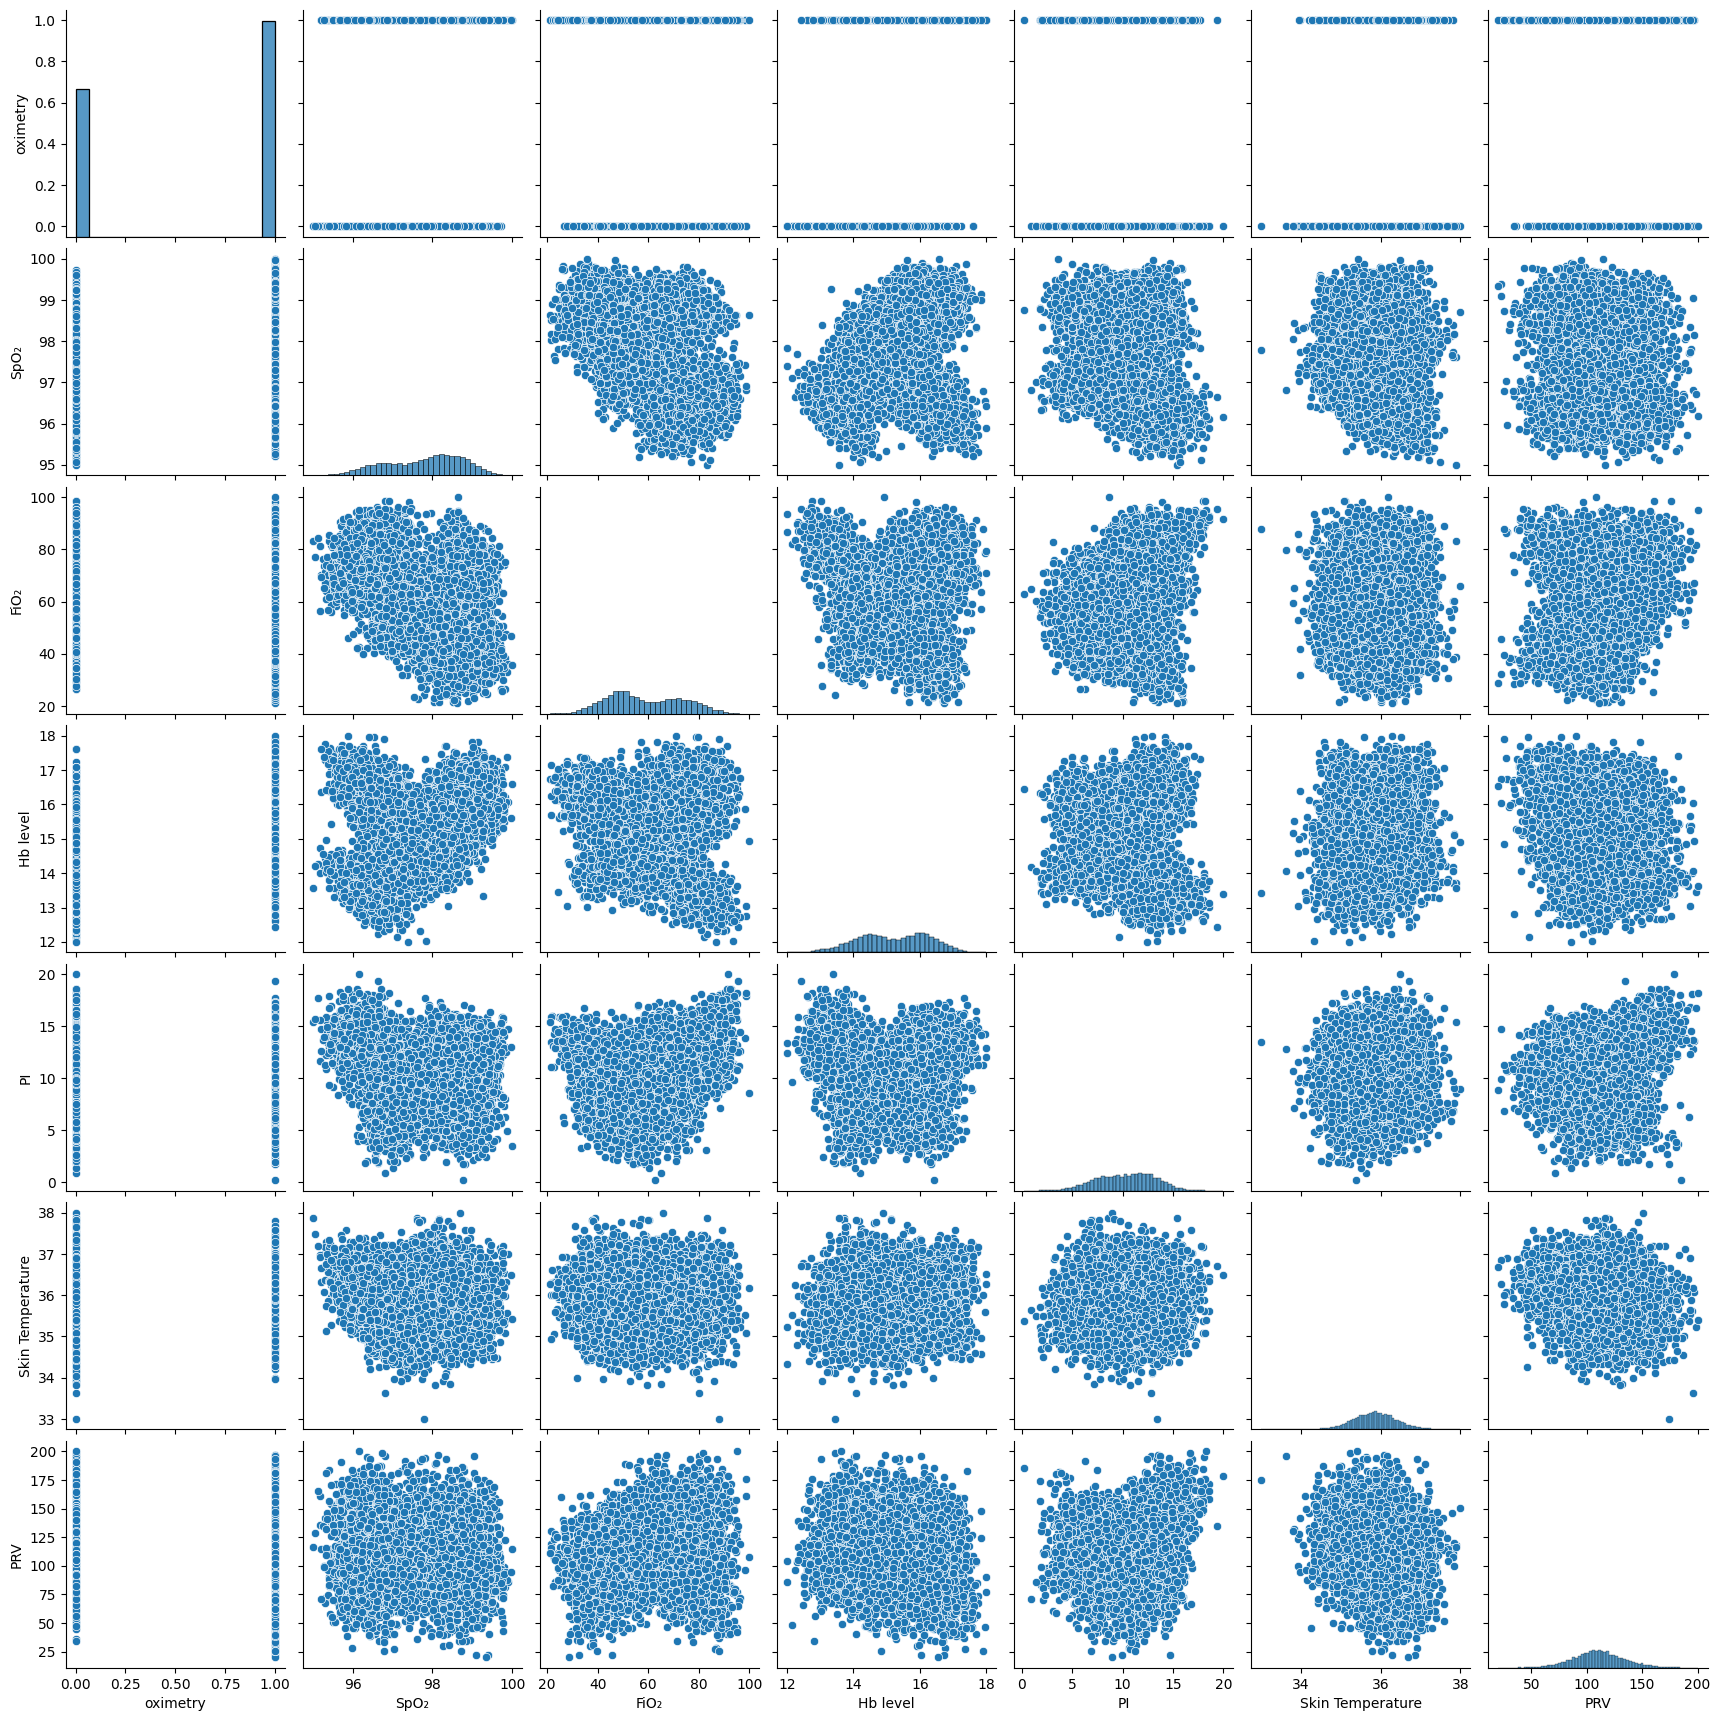

In [92]:
sns.pairplot(observation[[
    "oximetry", "SpO₂", "FiO₂", "Hb level", 
    "PI", "Skin Temperature", "PRV"
]])

Pearsons correlation: 0.659


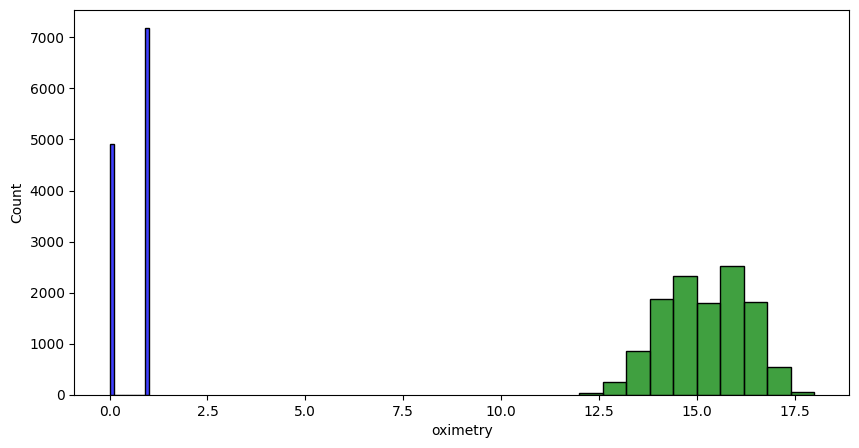

In [93]:
# cv_4 IAU_01_EDA-statistical-analysis, another way to show relationship beetween SpO₂ and oximetry 
from scipy.stats import pearsonr

# plotting
sns.histplot(observation["oximetry"], bins=10, color="blue")
sns.histplot(observation["Hb level"], bins=10, color="green")
# sns.histplot(observation["oximetry"], bins=10, color="blue")

# calculate pearson's correlation, manually 
corr, _ = pearsonr(observation["oximetry"], observation["Hb level"])
print('Pearsons correlation: %.3f' % corr)

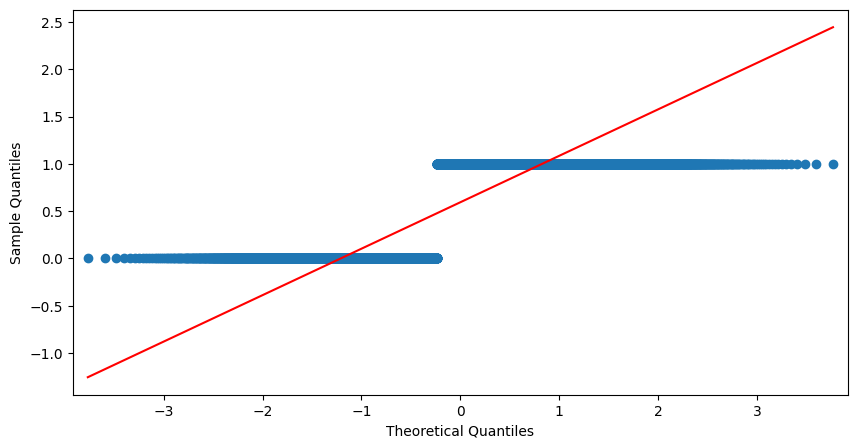

In [94]:
sm.qqplot(observation["oximetry"], line='s')
py.show()

We conducted a pairwise data analysis to identify the relationships between the predicted variable and other potential predictors.
The strongest positive correlations were observed with oximetry and Hb level, while FiO₂ showed a notable negative correlation.
Visualizations using regression plots confirmed these relationships. Additionally, a QQ plot was used to verify that oximetry values are approximately normally distributed, validating the use of the Pearson correlation.

---

● (E-1b) Document your initial thinking to address the project assignment, e.g.   
a) are any attributes interdependent?   
b) on which attributes does the predicted variable?  
c) whether records from multiple files need to be combined?    

a) are any attributes interdependent?   


During our analysis, we found some dependencies between variables. The results in part C showed dependencies between the attributes selected in the second part: oximetry & SpO₂, HR & CO, Hb level & SpO₂, Hb level & CO. from those that were not selected in the second part: SpO₂ & PI, Pi & PRV.  

b) on which attributes does the predicted variable depend?  


In part D we showed that, the predicted variable oximetry has significant positive correlation with SpO₂, Hb level, PI and a negative correlation with FiO₂, PRV. 

c) whether records from multiple files need to be combined?   

There is no immediate need to merge data from multiple files, unless patient-specific information such as date of birth or blood type is required. The location of the station where the examination took place shows little dependency on the predicted variables.
Therefore, it may be more convenient to work with separate datasets.